In [1]:
## import pickle
import numpy as np
import matplotlib.pyplot as plt
from data.visualise import grid_psfs, show_psf_axial
from tifffile import imread
import pandas as pd
import seaborn as sns

def load_pickle_file(dpath):
    with open(dpath, 'rb') as f:
        return pickle.load(f)

# # MQ_data     
# stacks = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/beads_box15/combined/stacks.ome.tif'
# locs = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/beads_box15/combined/locs.hdf'
# exclude_idx = [5, 7, 11, 14, 22, 24, 26, 27, 28, 31, 32, 35, 37, 38, 40, 45, 50, 51, 54, 68, 69, 71, 72, 82, 87, 89, 91, 98, 102, 108, 109, 112, 113, 115, 116, 121, 122, 123, 127, 129, 131, 132, 133, 138, 141, 144, 150, 151, 154, 161, 167, 169, 170, 172, 178, 179, 181, 182, 184, 185, 186, 187, 190, 200, 201, 205, 206, 210, 214, 219, 221, 224, 226, 230, 233, 234, 235, 236, 237, 243]
# Z_STEP = 20

# FD-deeploc data
stacks = '/home/miguel/Projects/uni/data/smlm_3d/fd-deeploc-data/Astigmatism_beads_stacks_2um/combined/stacks.ome.tif'
locs = '/home/miguel/Projects/uni/data/smlm_3d/fd-deeploc-data/Astigmatism_beads_stacks_2um/combined/locs.hdf'
exclude_idx = []
Z_STEP = 50

all_psfs = imread(stacks)
all_locs = pd.read_hdf(locs, key='locs')

all_psfs = all_psfs[:, :, :, :, np.newaxis]

print(all_psfs.shape, all_psfs.dtype)

# # for i, psf in enumerate(psfs.sum(axis=-1)):
# #     plt.title(str(i))
# #     show_psf_axial(psf)


# # exclude_idx = [0, 5, 7, 12, 22, 26, 32, 35, 38, 40, 45, 50, 51, 54, 68, 69, 71, 72, 82, 87, 89, 91, 98, 102, 108, 109, 112, 113, 115, 116, 121, 122, 123, 124, 127, 129, 131, 132, 133, 138, 141, 144, 150, 151, 154, 161, 167, 169, 170, 172, 178, 179, 181, 182, 184, 185, 186, 187, 190, 200, 201, 205, 206, 210, 214, 219, 221, 224, 226, 230, 233, 234, 235, 236, 237, 243]

# # print('Excluded PSFs \n\n\n\n\n')
# # for i in exclude_idx:
# #     show_psf_axial(psfs[i].mean(axis=-1), str(i))
# #     plt.plot(psfs[i].max(axis=(1,2)))
# #     plt.show()
# # print('End of excluded PSFs \n\n\n\n\n')

# # print(psfs.shape[0])
# # for i in range(psfs.shape[0]):
# #     if i in exclude_idx:
# #         continue
# #     plt.title(str(i))
# #     show_psf_axial(psfs[i].mean(axis=-1))
# #     plt.plot(psfs[i].max(axis=(1,2,3)), label='max')
# #     plt.legend()
# #     plt.title(str(i))
# #     plt.show()

# idx = [i for i in range(psfs.shape[0]) if i not in exclude_idx]
# psfs = psfs[idx]
# locs = locs.iloc[idx]
all_locs['idx'] = np.arange(all_locs.shape[0])


(6259, 201, 15, 15, 1) uint16


In [2]:
# xlim = ((450, 750))
# ylim = ((450, 750))


# xlim = ((810, 810+250))
# ylim = ((790, 790+250))

xlim = ((0, 3000))
ylim = ((0, 3000))


idx = (xlim[0] < all_locs['x']) & (all_locs['x'] < xlim[1]) & (ylim[0] < all_locs['y']) & (all_locs['y'] < ylim[1])
locs = all_locs[idx]
psfs = all_psfs[locs['idx']]

print(psfs.shape)

ys = []
for i in range(psfs.shape[0]):
    y = np.arange(psfs.shape[1]) * Z_STEP
    y = y - 1000
    ys.append(y)
ys = np.stack(ys)

(6259, 201, 15, 15, 1)


In [3]:
print(psfs.shape, psfs.min(), psfs.max())
print(ys.shape)
print(locs.shape)

(6259, 201, 15, 15, 1) 123 18440
(6259, 201)
(6259, 14)


In [4]:
from tifffile import imwrite, imread
fname = './tmp.tif'
# imwrite(fname, psfs)

# psfs = imread(fname)

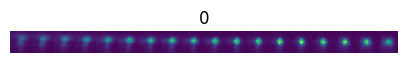

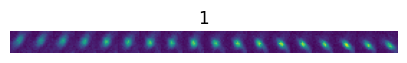

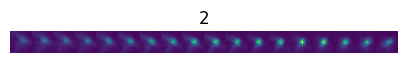

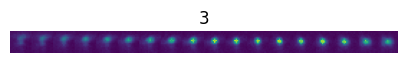

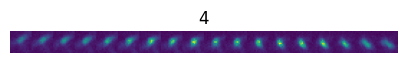

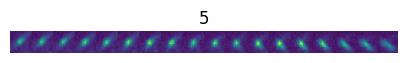

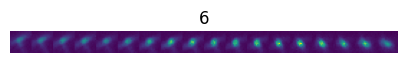

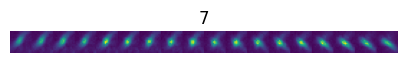

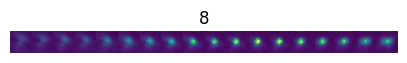

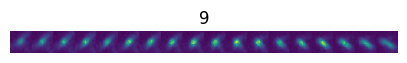

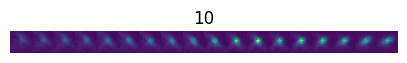

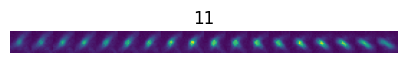

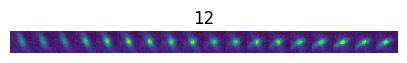

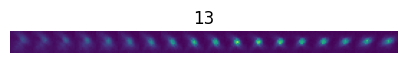

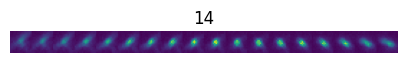

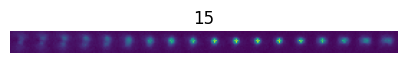

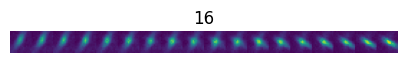

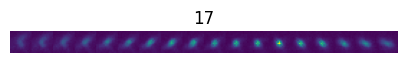

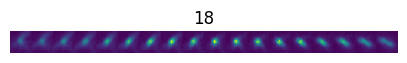

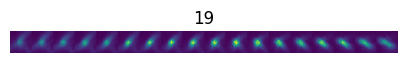

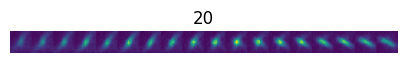

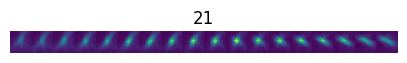

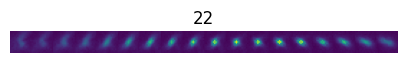

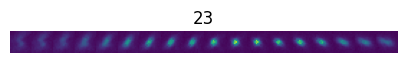

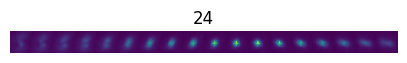

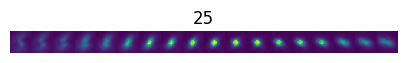

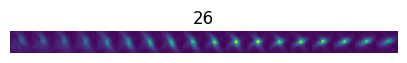

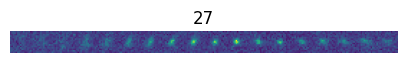

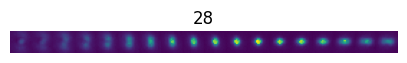

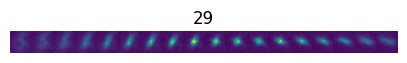

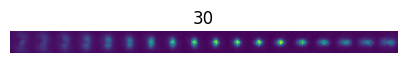

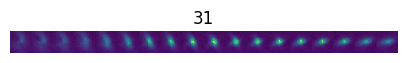

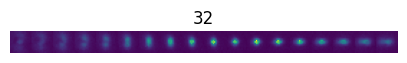

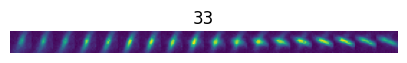

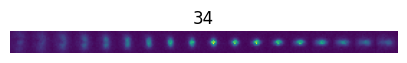

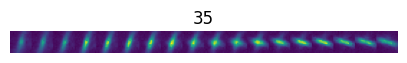

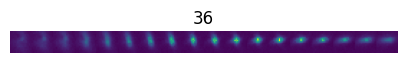

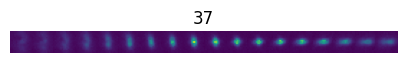

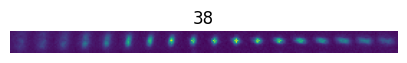

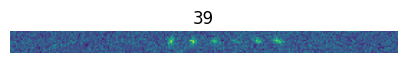

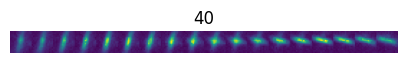

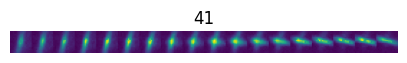

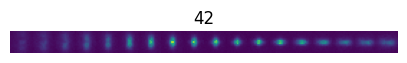

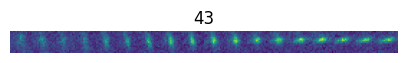

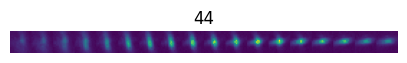

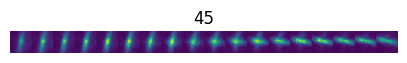

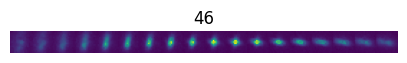

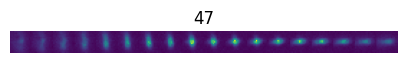

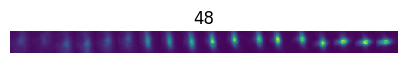

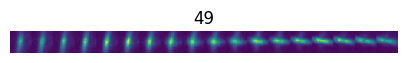

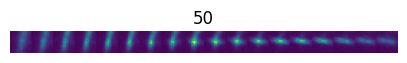

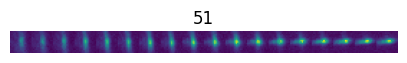

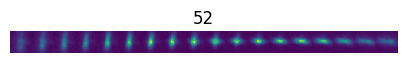

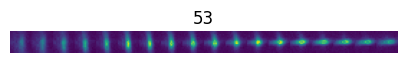

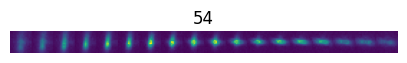

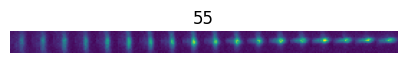

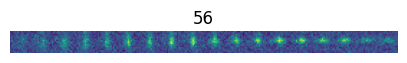

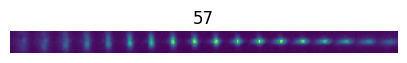

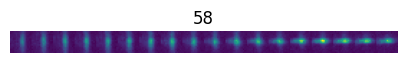

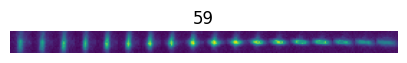

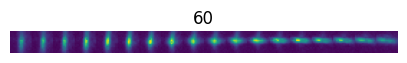

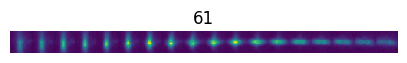

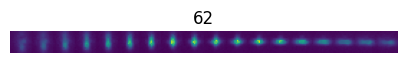

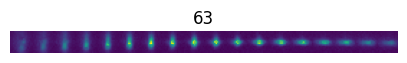

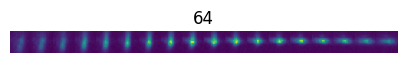

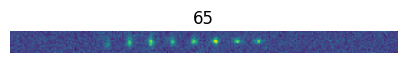

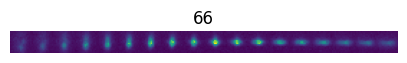

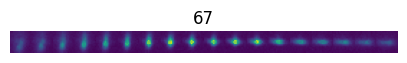

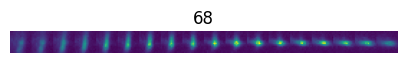

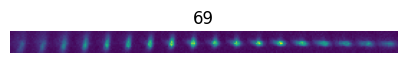

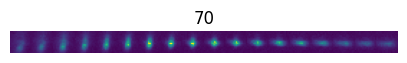

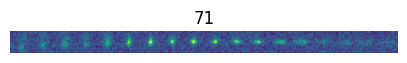

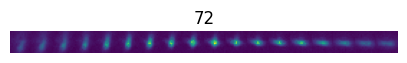

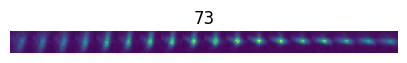

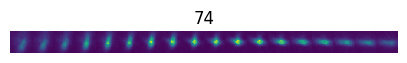

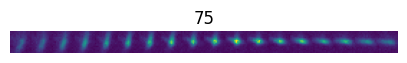

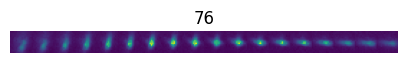

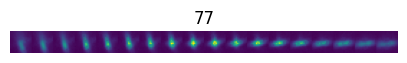

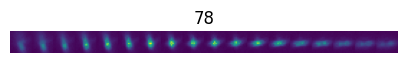

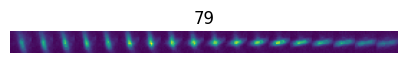

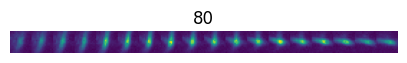

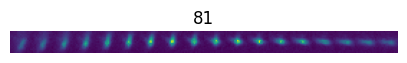

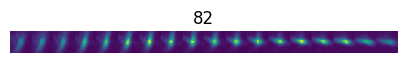

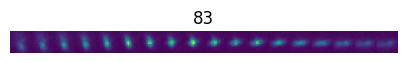

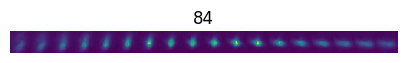

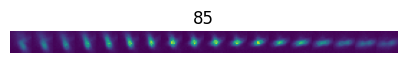

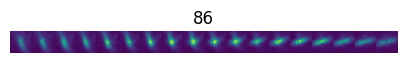

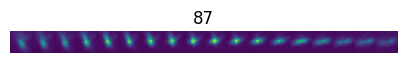

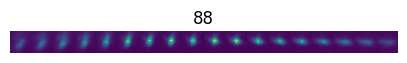

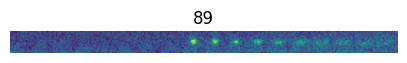

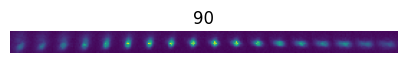

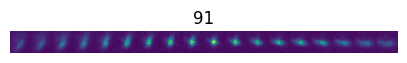

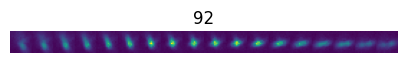

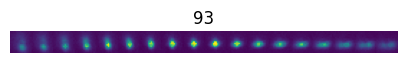

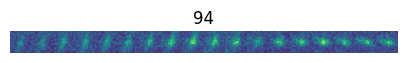

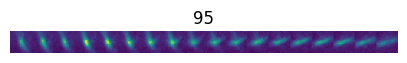

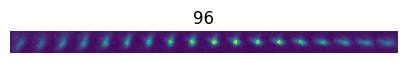

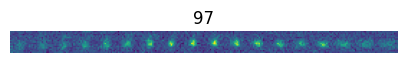

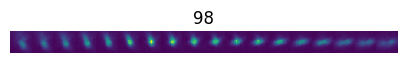

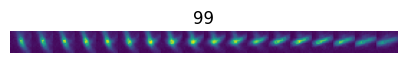

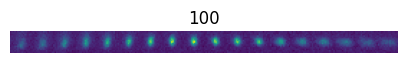

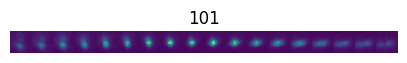

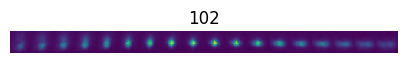

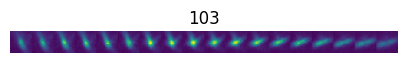

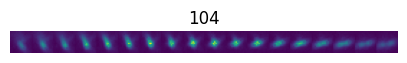

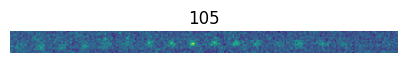

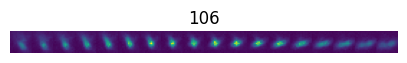

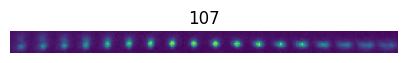

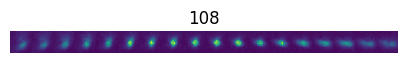

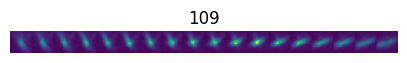

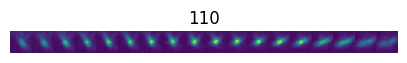

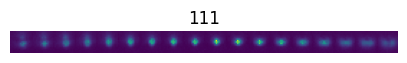

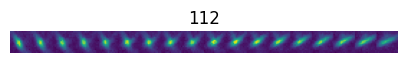

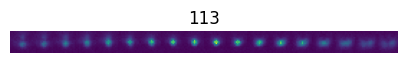

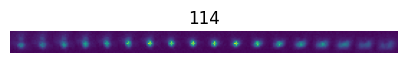

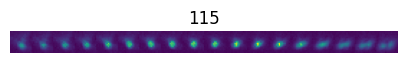

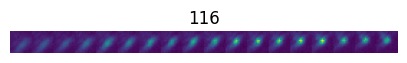

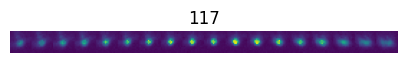

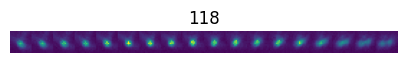

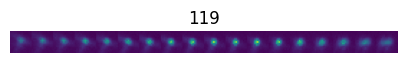

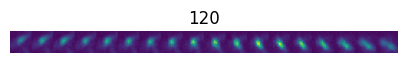

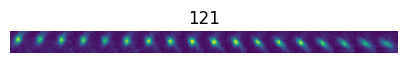

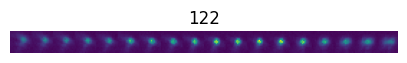

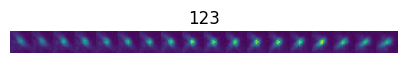

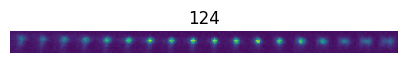

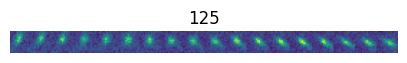

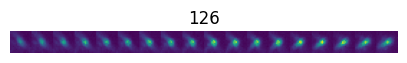

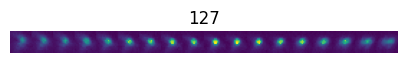

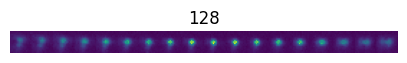

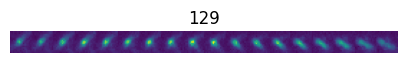

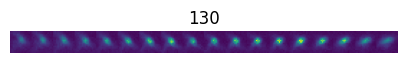

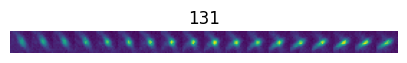

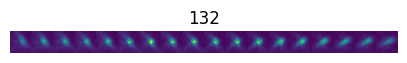

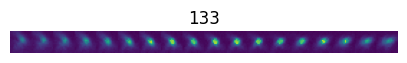

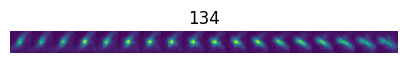

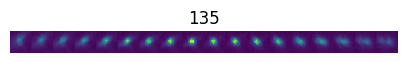

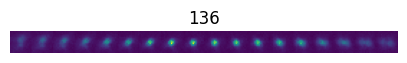

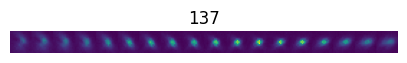

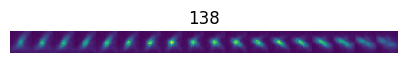

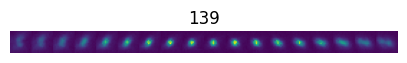

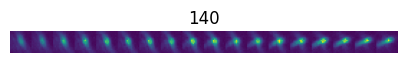

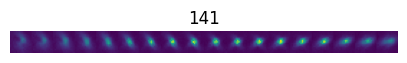

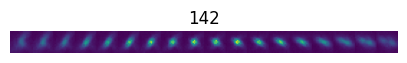

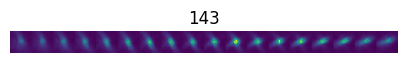

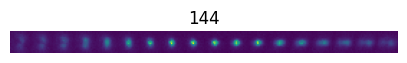

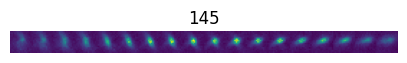

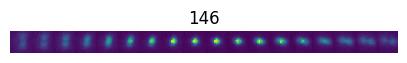

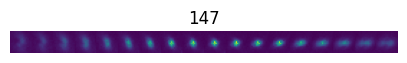

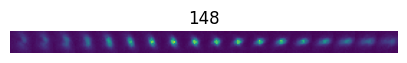

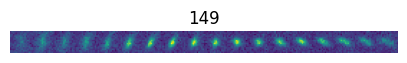

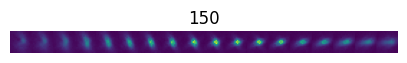

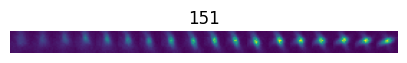

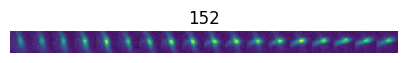

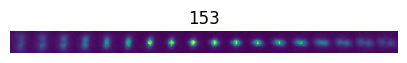

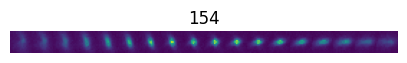

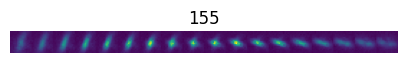

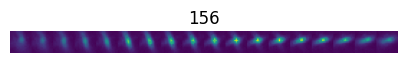

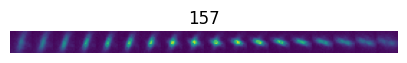

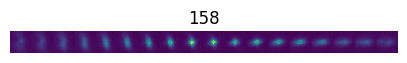

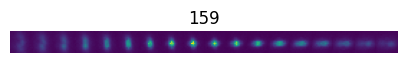

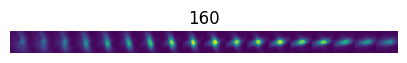

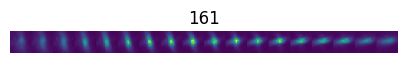

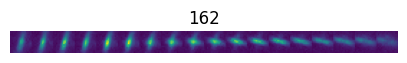

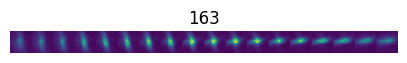

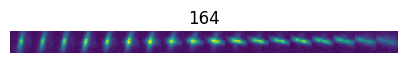

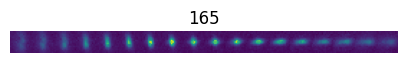

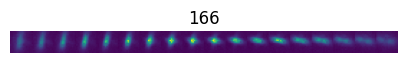

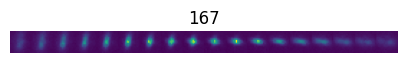

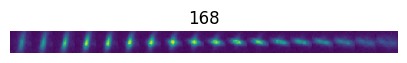

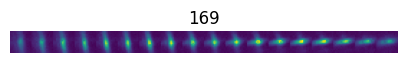

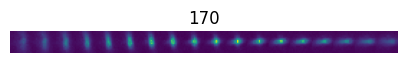

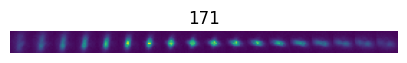

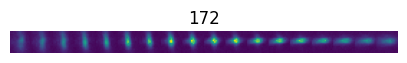

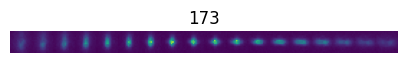

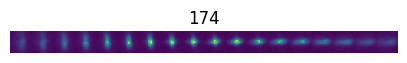

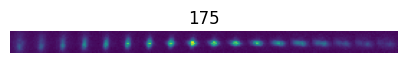

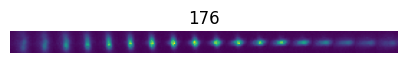

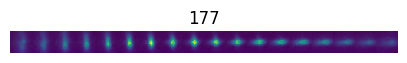

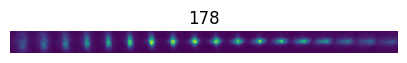

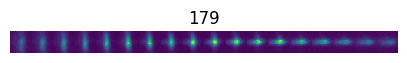

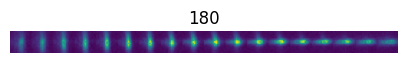

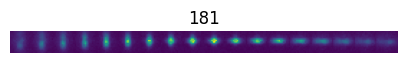

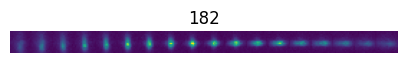

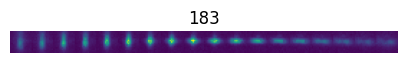

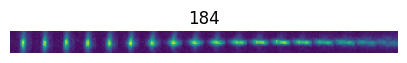

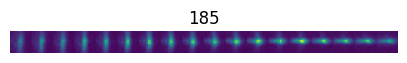

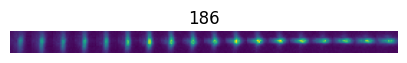

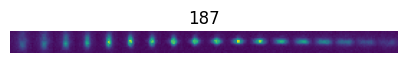

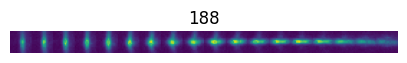

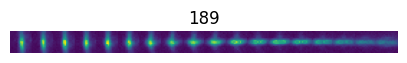

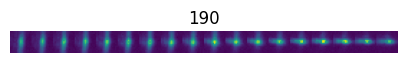

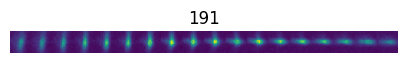

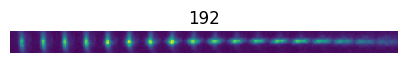

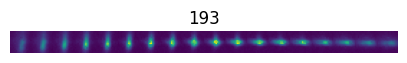

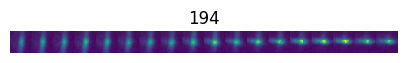

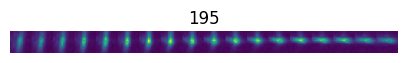

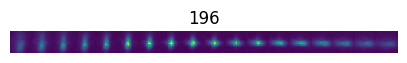

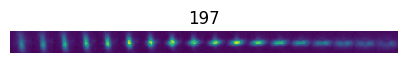

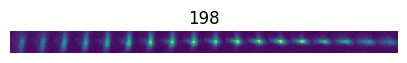

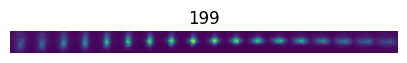

In [5]:
from data.visualise import show_psf_axial
plt.rcParams['figure.figsize'] = [5, 3]
for i, psf in enumerate(psfs[0:200]):
    show_psf_axial(psf.mean(axis=-1), str(i))


In [6]:
# exclude_idx = [35, 55, 60, 96, 104, 113, 128, 132, 230, 234]
# exclude_idx = [82, 109, 114, 138, 141, 149, 153]
exclude_idx = []
idx = [i for i in range(psfs.shape[0]) if i not in exclude_idx]
psfs = psfs[idx]
locs = locs.iloc[idx]

2023-08-14 08:35:32.696302: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 08:35:33.189026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
0it [00:00, ?it/s]

[852]


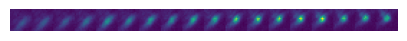

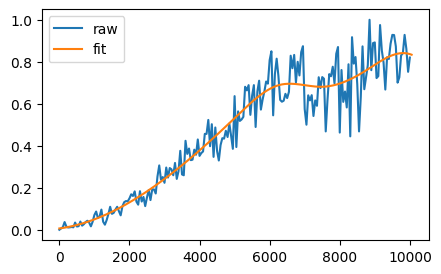

322it [00:00, 965.48it/s]

[1592]


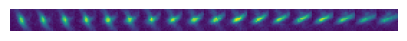

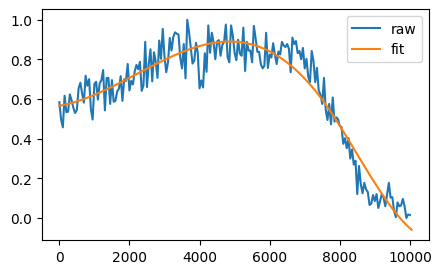

400it [00:00, 830.99it/s]

[1610]


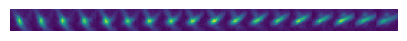

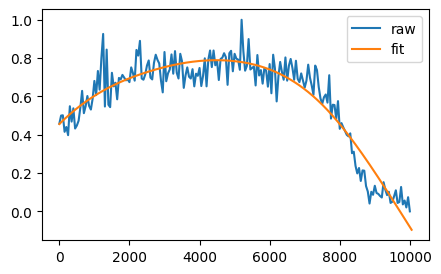

[1068]


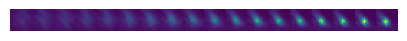

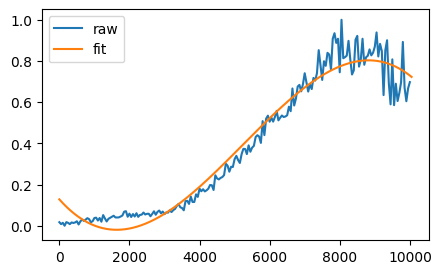

474it [00:00, 590.53it/s]

[845]


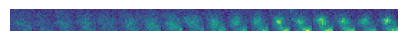

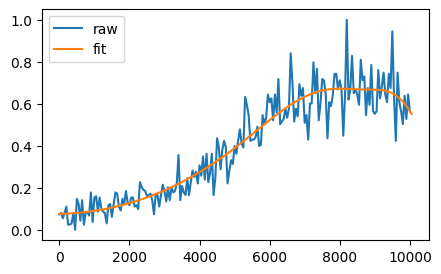

568it [00:00, 622.64it/s]

[1735]


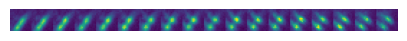

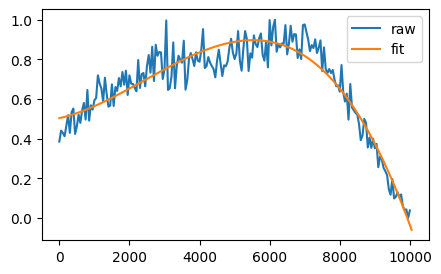

[853]


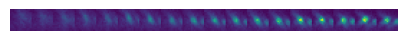

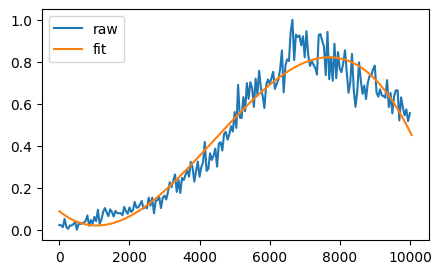

633it [00:00, 482.33it/s]

[894]


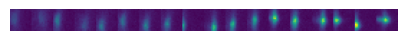

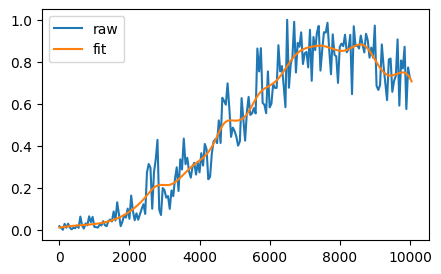

688it [00:01, 481.86it/s]

[1639]


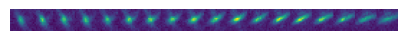

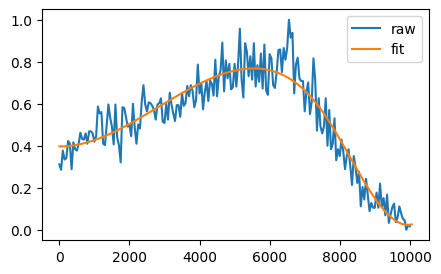

741it [00:01, 477.76it/s]

[1555]


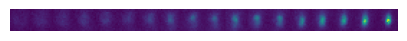

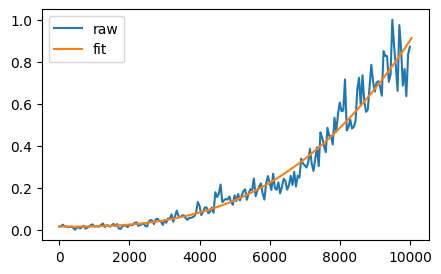

838it [00:01, 530.80it/s]

[1227]


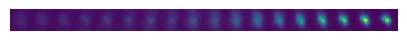

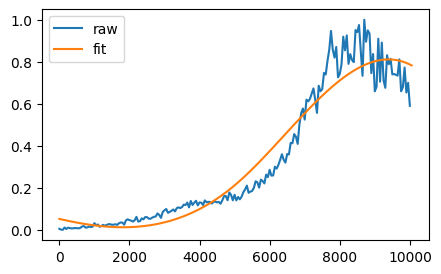

959it [00:01, 595.22it/s]

[597]


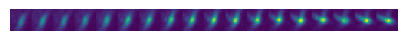

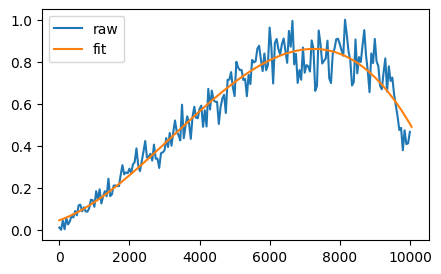

[1593]


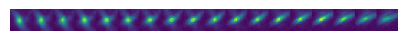

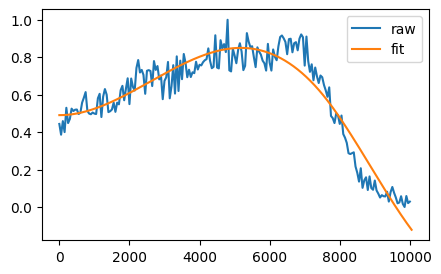

[812]


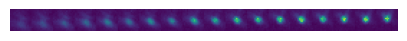

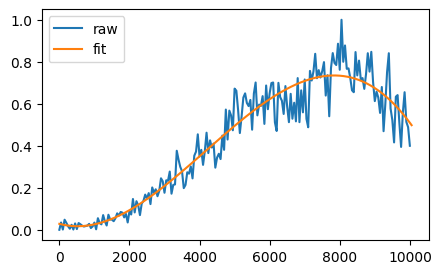

1024it [00:01, 334.41it/s]

[815]


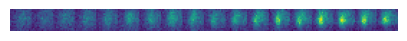

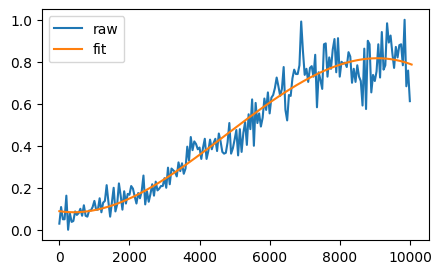

1082it [00:01, 371.66it/s]

[1623]


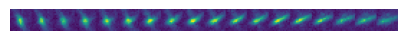

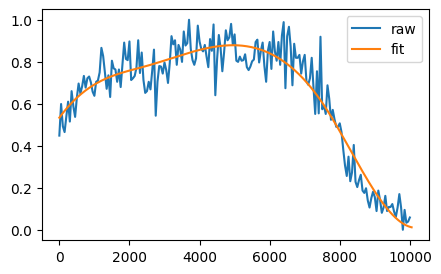

1174it [00:02, 433.00it/s]

[574]


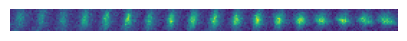

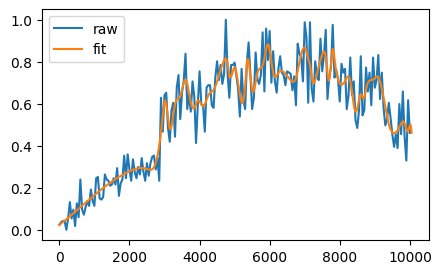

1231it [00:02, 447.59it/s]

[600]


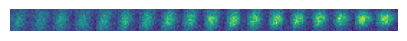

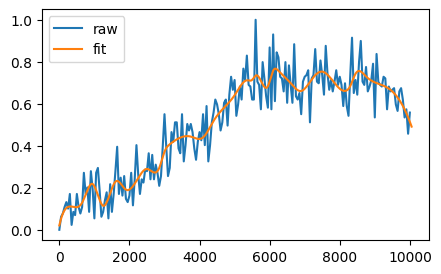

1286it [00:02, 458.64it/s]

[1674]


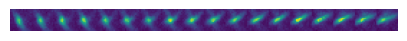

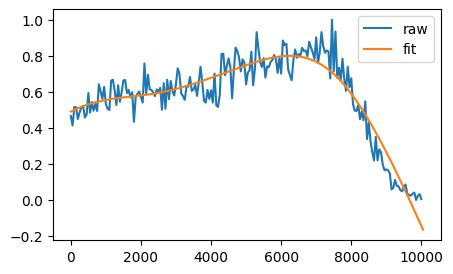

1477it [00:02, 552.89it/s]

[1361]


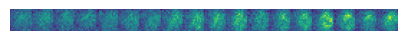

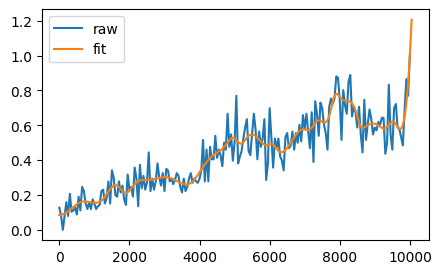

[780]


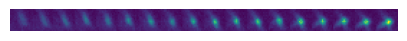

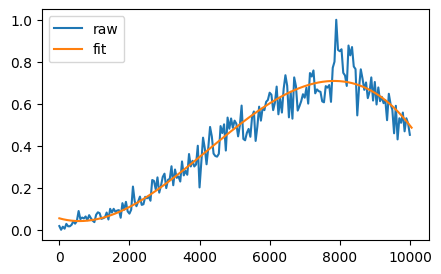

[903]


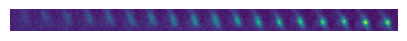

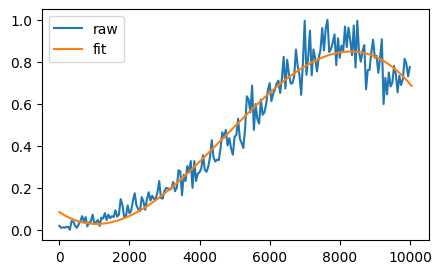

[1577]


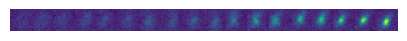

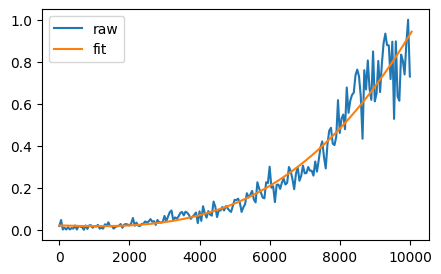

[1258]


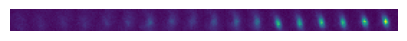

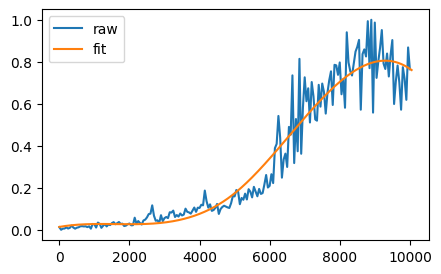

[1092]


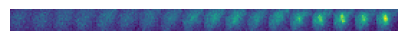

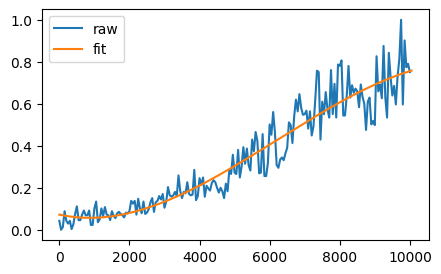

[1094]


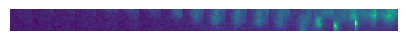

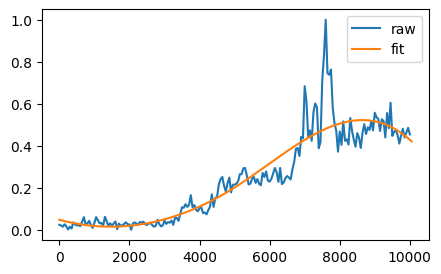

[1009]


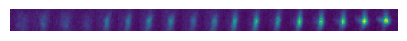

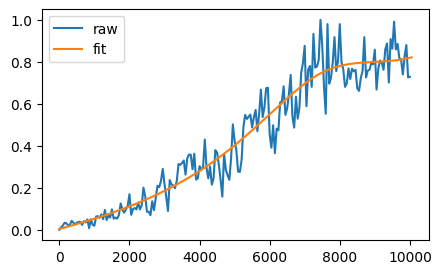

1546it [00:03, 226.52it/s]

[688]


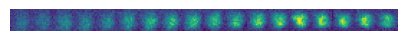

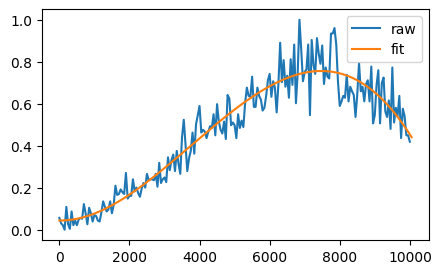

1716it [00:03, 295.13it/s]

[1566]


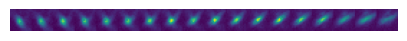

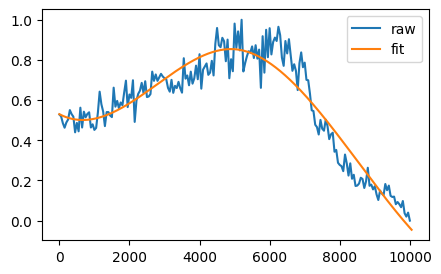

[915]


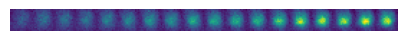

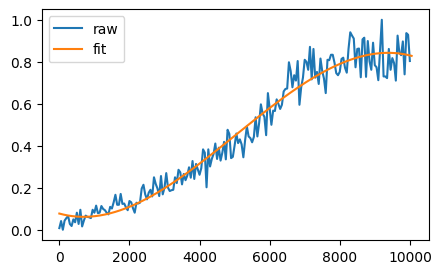

1782it [00:03, 302.93it/s]

[1616]


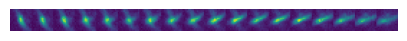

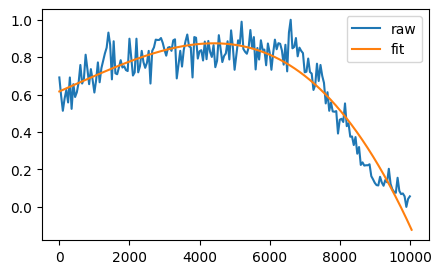

1882it [00:03, 368.78it/s]

[1541]


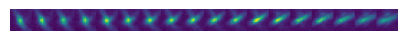

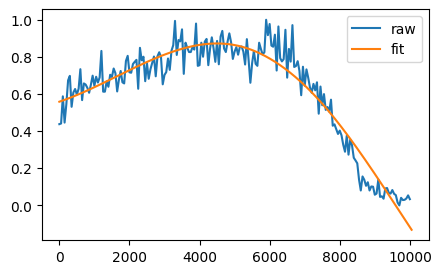

[1593]


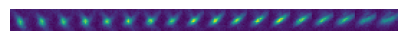

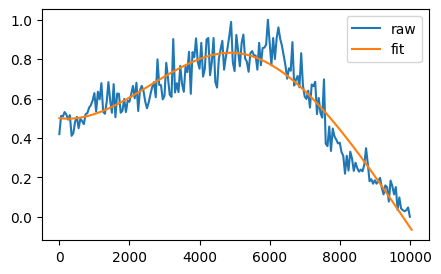

1944it [00:03, 347.36it/s]

[750]


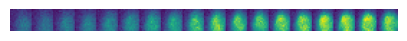

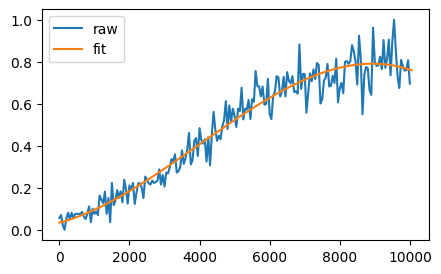

2032it [00:04, 407.21it/s]

[816]


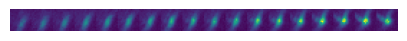

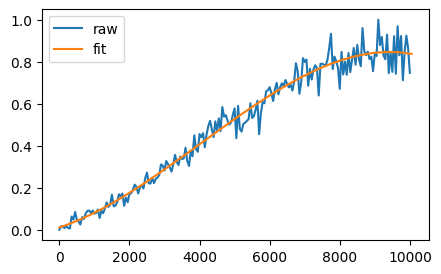

2089it [00:04, 429.87it/s]

[867]


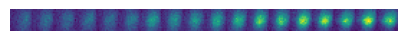

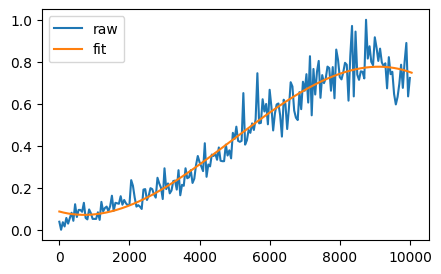

2178it [00:04, 413.67it/s]

[1611]


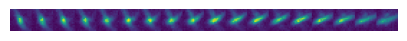

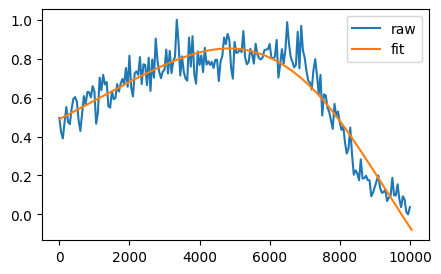

2376it [00:04, 508.30it/s]

[703]


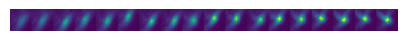

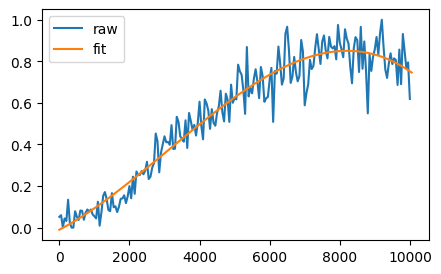

2444it [00:04, 524.22it/s]

[1464]


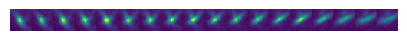

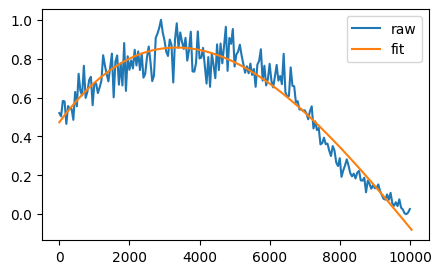

2544it [00:04, 576.20it/s]

[1540]


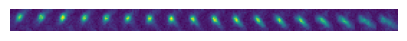

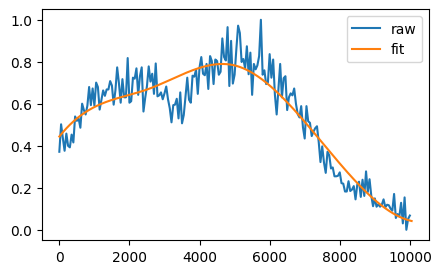

2612it [00:04, 573.67it/s]

[555]


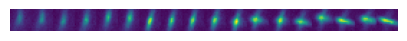

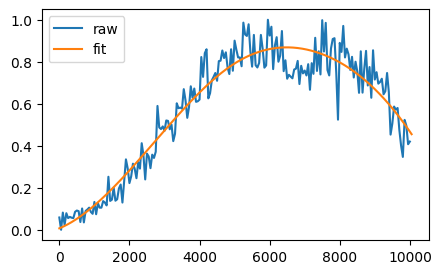

2764it [00:05, 650.93it/s]

[729]


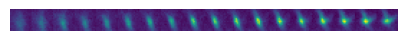

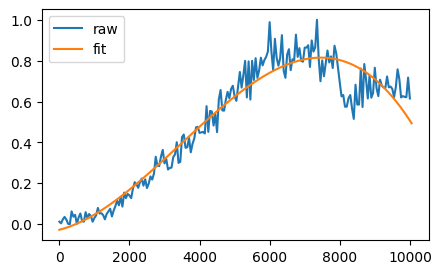

2857it [00:05, 667.82it/s]

[811]


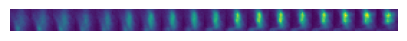

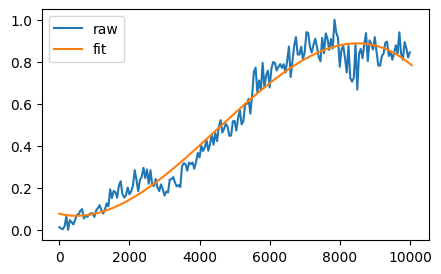

[775]


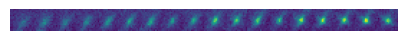

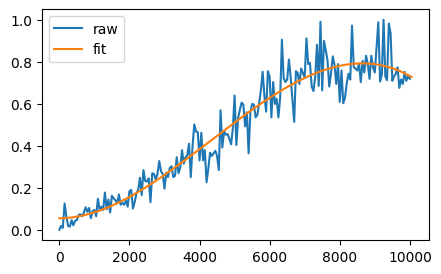

2930it [00:05, 524.18it/s]

[459]


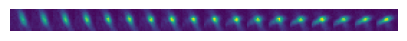

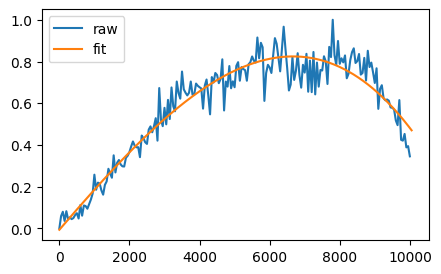

3115it [00:05, 617.53it/s]

[781]


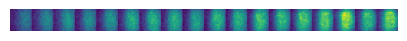

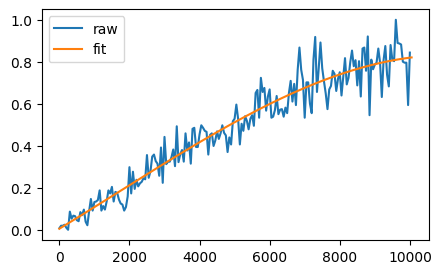

3190it [00:05, 614.27it/s]

[472]


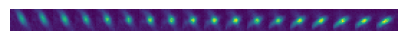

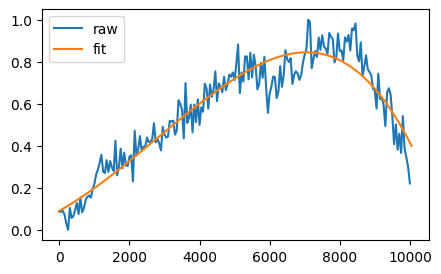

3281it [00:05, 636.38it/s]

[576]


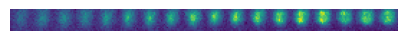

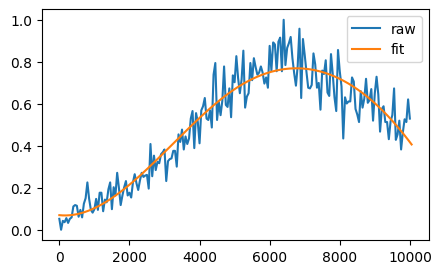

3352it [00:05, 622.65it/s]

[496]


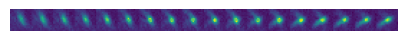

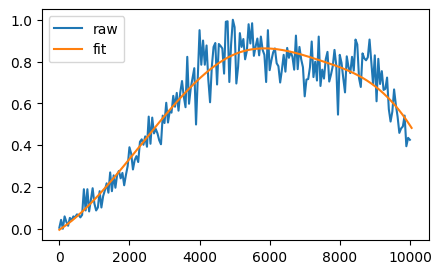

3450it [00:06, 651.51it/s]

[413]


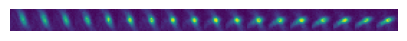

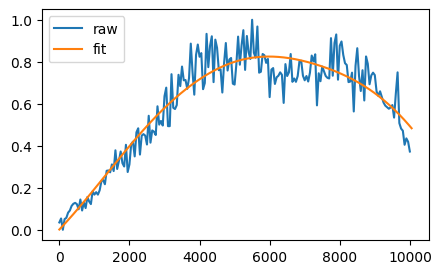

[695]


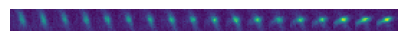

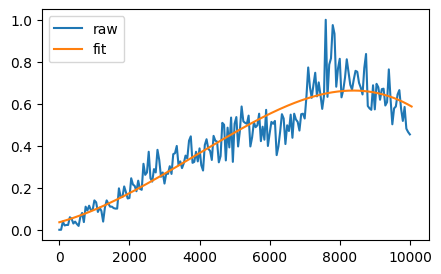

3723it [00:06, 655.99it/s]

[929]


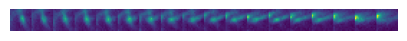

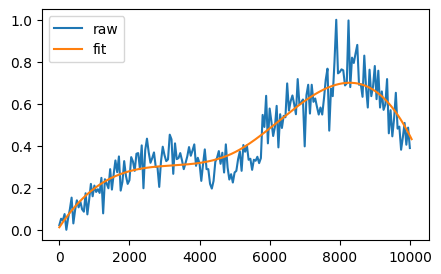

[566]


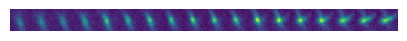

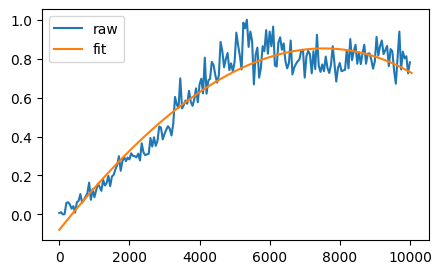

[565]


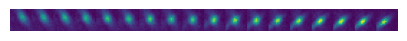

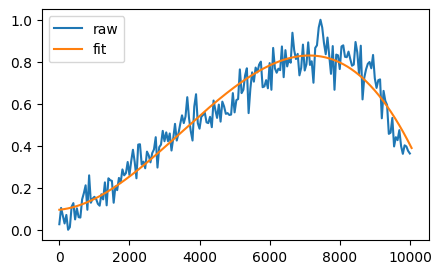

[494]


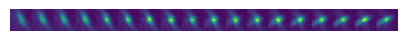

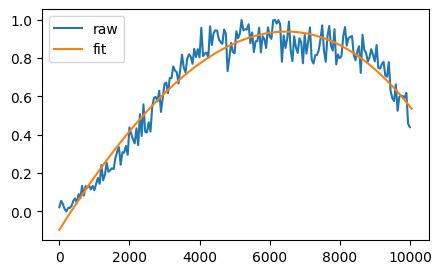

3825it [00:06, 449.10it/s]

[659]


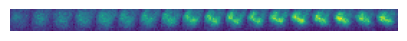

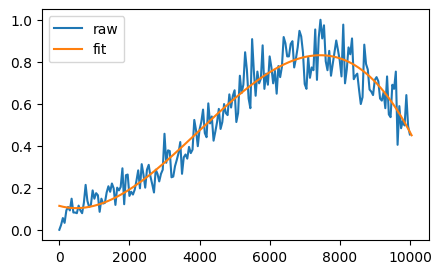

3952it [00:06, 524.27it/s]

[1653]


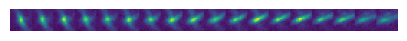

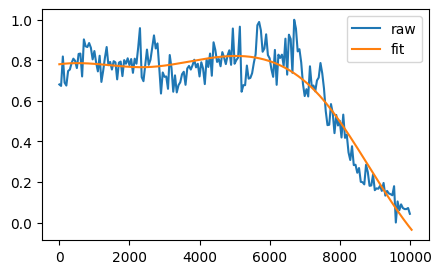

4072it [00:07, 590.80it/s]

[1017]


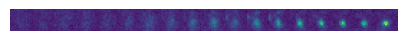

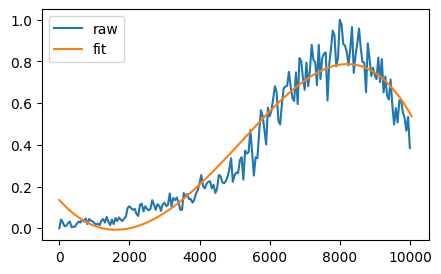

4154it [00:07, 605.33it/s]

[1822]


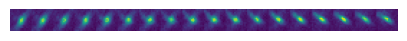

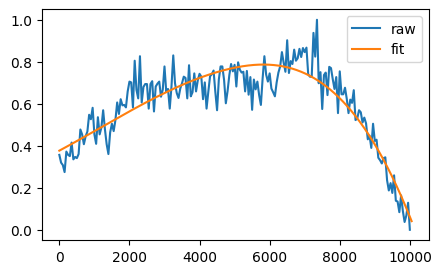

4255it [00:07, 535.30it/s]

[535]


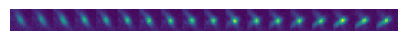

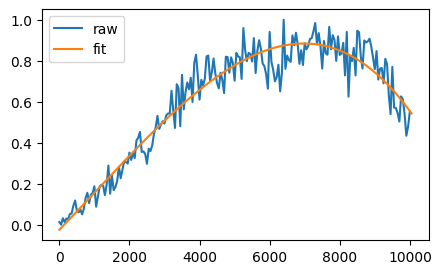

[519]


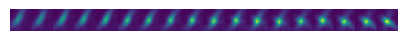

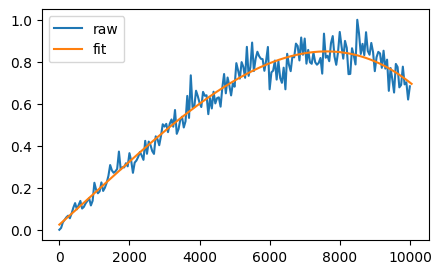

4322it [00:07, 449.44it/s]

[888]


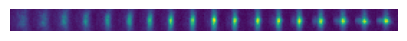

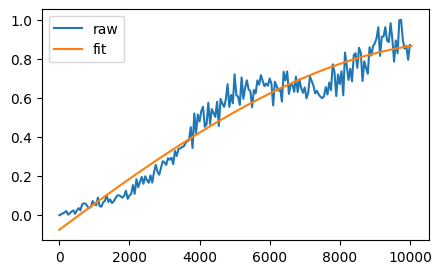

4379it [00:07, 462.86it/s]

[603]


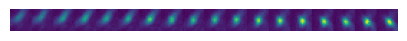

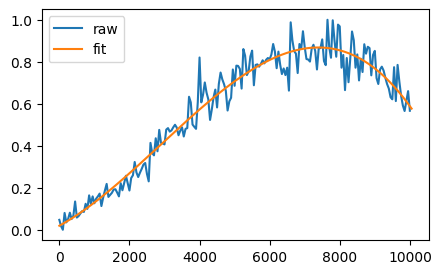

4434it [00:07, 468.91it/s]

[1029]


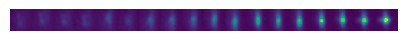

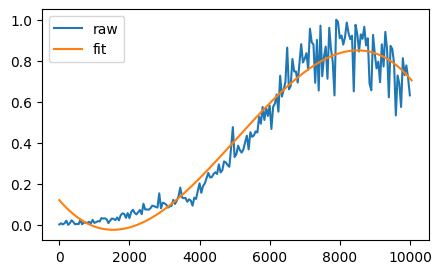

4487it [00:08, 469.31it/s]

[1576]


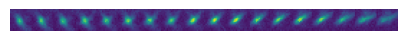

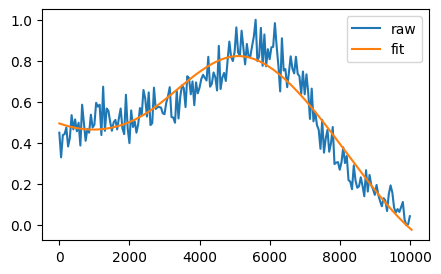

4576it [00:08, 519.62it/s]

[882]


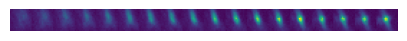

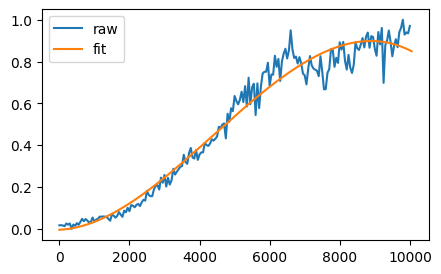

[1178]


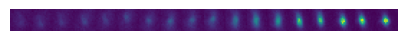

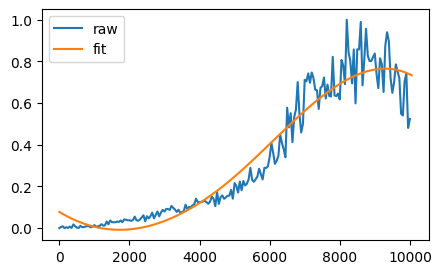

4840it [00:08, 547.64it/s]

[662]


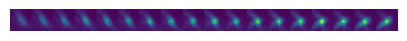

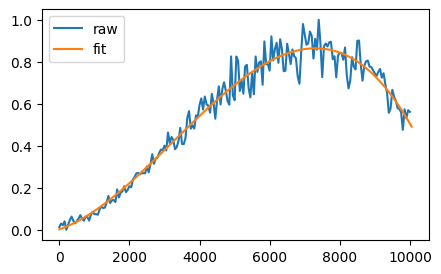

4936it [00:08, 590.37it/s]

[658]


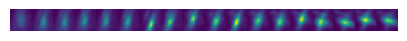

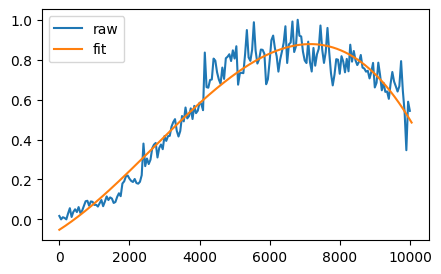

5025it [00:08, 616.02it/s]

[1614]


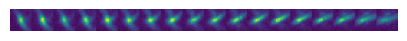

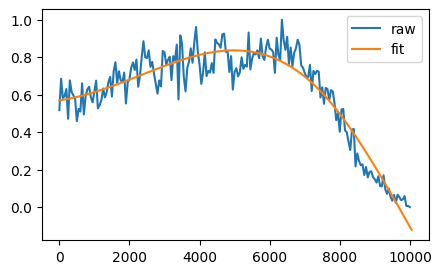

5108it [00:08, 625.36it/s]

[725]


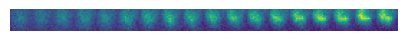

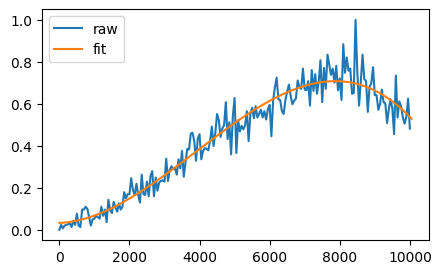

5186it [00:08, 625.49it/s]

[1570]


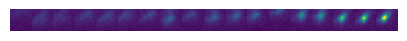

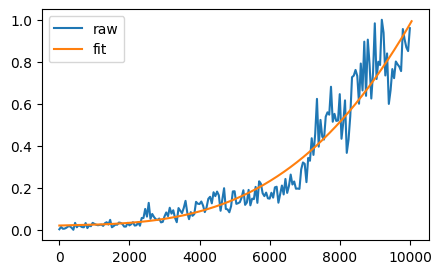

5279it [00:09, 649.40it/s]

[1661]


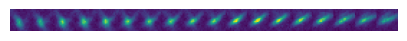

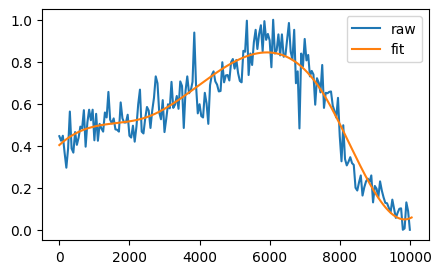

5421it [00:09, 710.76it/s]

[811]


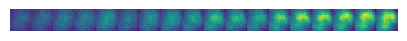

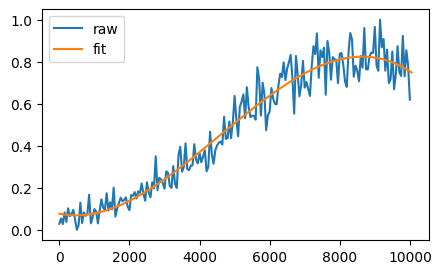

5500it [00:09, 684.40it/s]

[740]


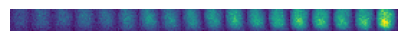

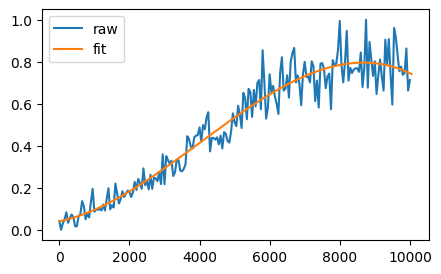

5641it [00:09, 738.53it/s]

[924]


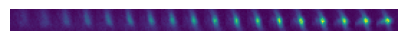

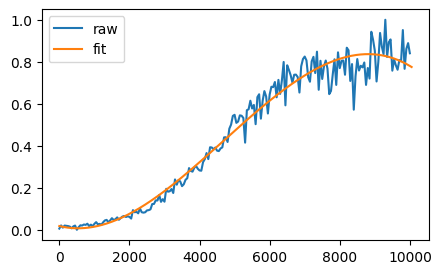

5720it [00:09, 704.15it/s]

[487]


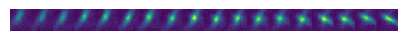

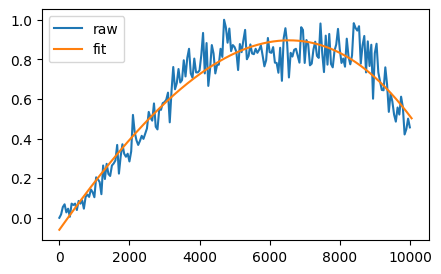

5795it [00:09, 672.98it/s]

[]


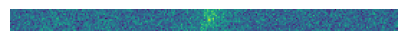

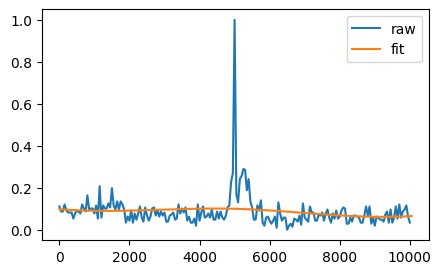

[1004]


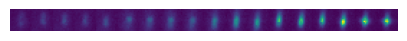

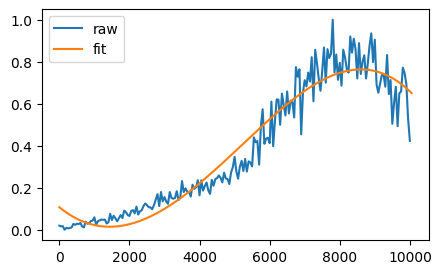

[1129]


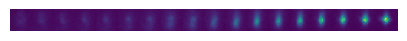

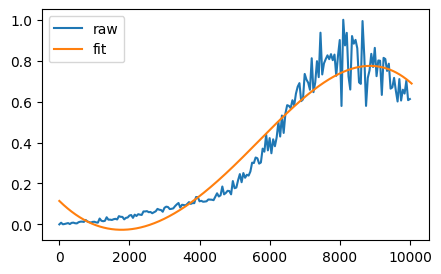

5866it [00:10, 439.33it/s]

[542]


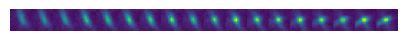

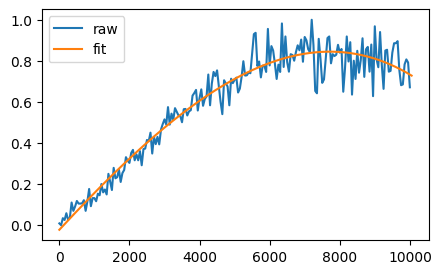

5937it [00:10, 475.42it/s]

[1650]


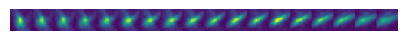

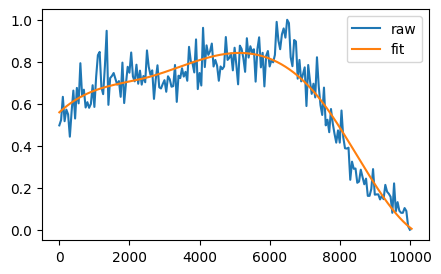

6089it [00:10, 501.52it/s]

[1573]


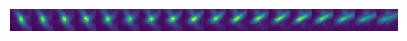

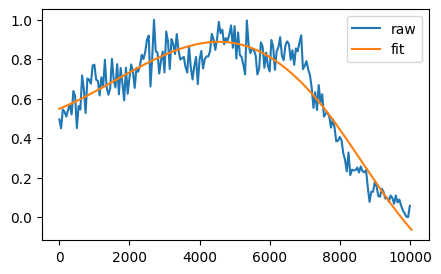

[600]


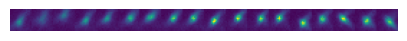

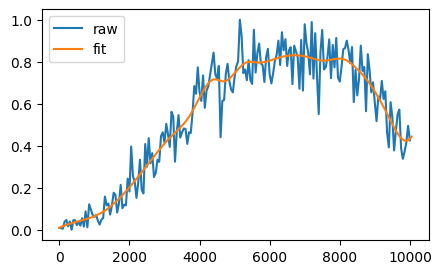

[734]


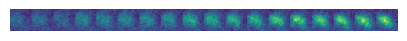

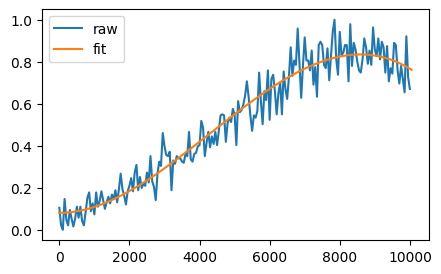

[634]


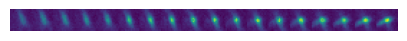

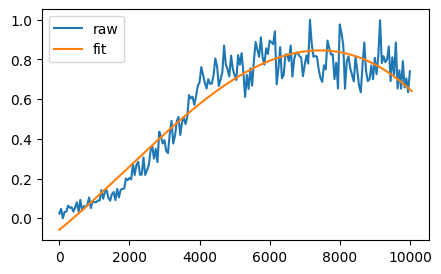

6147it [00:10, 300.69it/s]

[799]


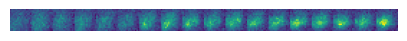

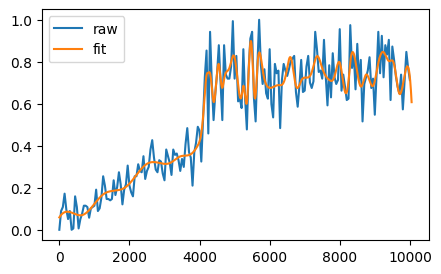

6259it [00:10, 569.62it/s]


In [7]:
# Spline peak finding
from tqdm import tqdm
import numpy as np
Z_STEP = 50

from scipy.interpolate import UnivariateSpline
from data.align_psfs import norm_zero_one

UPSCALE_RATIO = 10

bad_psfs_idx = []

def find_peak(i, psf):
    if psf.ndim == 4:
        psf = psf.mean(axis=-1)
    x = np.arange(psf.shape[0]) * Z_STEP
    inten = norm_zero_one(psf.max(axis=(1,2)))
#   prev 0.8

#     cs = UnivariateSpline(x, inten, k=3, s=1.25)

#     x_ups = np.linspace(0, psf.shape[0], len(x) * UPSCALE_RATIO) * Z_STEP
    
#     peak = x_ups[np.argmax(cs(x_ups))] 
    
    
#     peak_idx = np.argmax(cs(x_ups))
#     center_x = len(x_ups) / 2
#     if abs(center_x - peak_idx) > 250:
#         bad_psfs_idx.append(i)
        
# #         show_psf_axial(psf)
# #         plt.plot(x-peak, inten, label='raw')
# #         plt.plot(x_ups-peak, cs(x_ups), label='fit')
# #         plt.legend()
# #         plt.show()

    cs = UnivariateSpline(x, inten, k=3, s=1.25)

    x_ups = np.linspace(0, psf.shape[0], len(x) * UPSCALE_RATIO) * Z_STEP
    
    fit = cs(x_ups)
    peak_x = np.argmax(fit)
    
    peak = max(fit)
    low = min(fit)
    half_max = (peak - low) / 2
    
    peak_idx = np.argmax(fit)
    center_x = len(x_ups) / 2
    
    half_max_crossings = np.where(np.diff(np.sign(fit-half_max)))[0]
    if len(half_max_crossings) < 2:
        print(half_max_crossings)
        bad_psfs_idx.append(i)
        show_psf_axial(psf)
        plt.plot(x-peak, inten, label='raw')
        plt.plot(x_ups-peak, cs(x_ups), label='fit')
        plt.legend()
        plt.show()
    
    min_x = min(x_ups-peak)
    max_x = max(x_ups-peak)
    
#     raise EnvironmentError
    return peak

offsets = np.array([find_peak(i, psf) for i, psf in tqdm(enumerate(psfs))])

good_idx = [i for i in range(len(psfs)) if i not in bad_psfs_idx]

offsets = offsets[good_idx]
psfs = psfs[good_idx]
locs = locs.iloc[good_idx]



In [8]:

ys = []
for i, offset in enumerate(offsets):
    zs = ((np.arange(psfs.shape[1])) * Z_STEP) -offset
    ys.append(zs)

ys = np.array(ys)


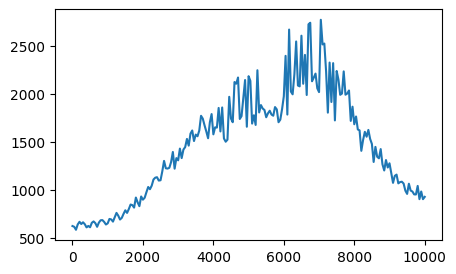

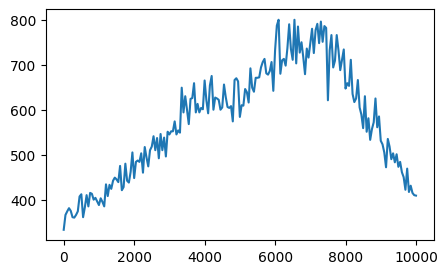

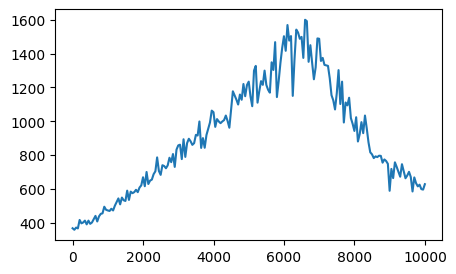

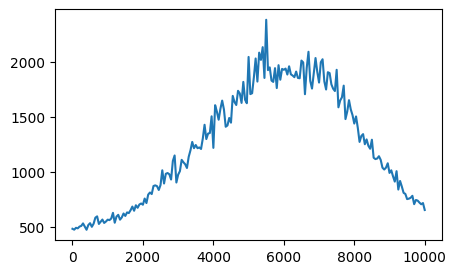

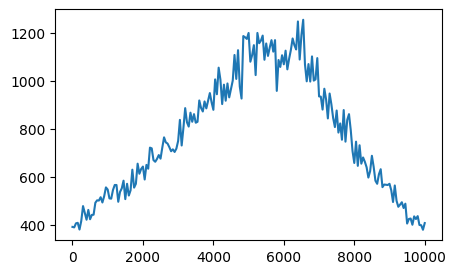

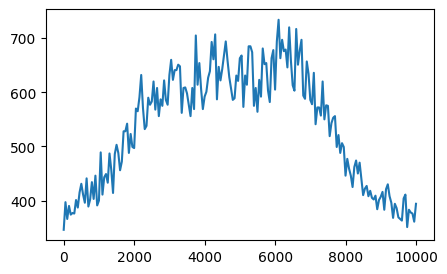

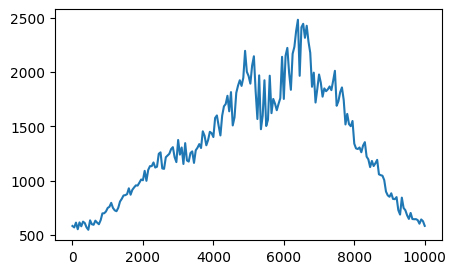

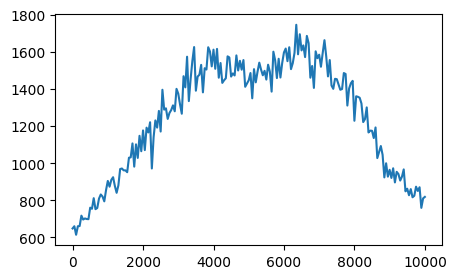

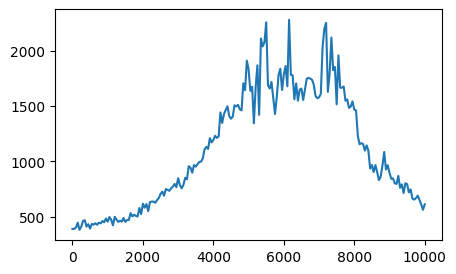

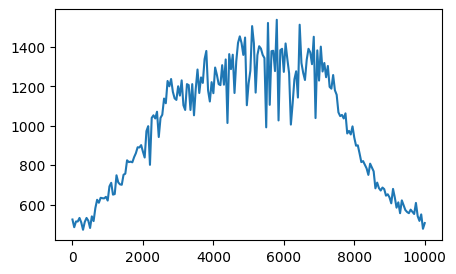

In [9]:
for psf, y in zip(psfs[0:10], ys):
    plt.plot(y, psf.max(axis=(1,2,3)))
    plt.show()

<AxesSubplot:xlabel='x', ylabel='y'>

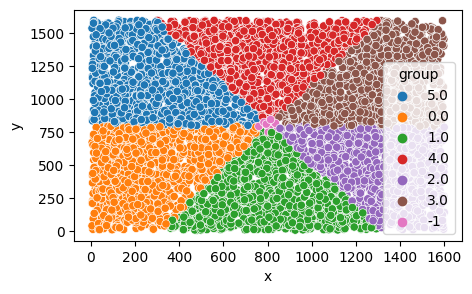

In [10]:
# Stratify according to area of FOV

from sklearn.preprocessing import KBinsDiscretizer
def cart2pol(xy):
    x, y = xy
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

center = locs[['x', 'y']].mean().to_numpy()
coords = locs[['x', 'y']].to_numpy() - center

polar_coords = np.stack([cart2pol(xy) for xy in coords])

discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal')
groups = discretizer.fit_transform(polar_coords[:, 1:2]).astype(str)

center_radius = 50
idx = np.argwhere(polar_coords[:, 0] <= center_radius).squeeze()
groups[idx] = -1

locs['group'] = groups

sns.scatterplot(data=locs, x='x', y='y', hue='group')


In [11]:
# Withold some PSFs for evaluation

from sklearn.model_selection import train_test_split

SEED = 42

idx = np.arange(psfs.shape[0])

train_idx, test_idx = train_test_split(idx, train_size=0.9, random_state=SEED, stratify=locs['group'])

_train_val_psfs = psfs[train_idx]
test_psfs = psfs[test_idx]

_train_val_ys = ys[train_idx]
test_ys = ys[test_idx]

train_fov_groups = locs['group'].to_numpy()[train_idx]

train_val_coords = locs[['x', 'y']].to_numpy()[train_idx]
test_coords = locs[['x', 'y']].to_numpy()[test_idx]

# ds_cls = np.zeros((psfs.shape[0]), dtype=object)
# ds_cls[train_idx] = 'train/val'
# ds_cls[test_idx] = 'test'
# locs['ds'] = ds_cls
# sns.scatterplot(data=locs, x='x', y='y', hue='ds')
# plt.show()

In [12]:

groups = np.repeat(np.arange(len(train_idx))[:, np.newaxis], psfs.shape[1], axis=1).flatten()

coords = np.repeat(train_val_coords[:, :, np.newaxis], psfs.shape[1], axis=0)

train_val_psfs = np.concatenate(_train_val_psfs)
train_val_ys = np.concatenate(_train_val_ys)
split_idx = np.arange(train_val_psfs.shape[0])

train_idx, val_idx = train_test_split(split_idx, train_size=0.9, random_state=SEED, stratify=groups)

train_psfs = train_val_psfs[train_idx]
train_ys = train_val_ys[train_idx][:, np.newaxis]

val_psfs = train_val_psfs[val_idx]
val_ys = train_val_ys[val_idx][:, np.newaxis]

val_coords = coords[val_idx].squeeze()
train_coords = coords[train_idx].squeeze()



In [13]:
# print(train_psfs.shape, train_ys.shape, _train_groups.shape)
# print(val_psfs.shape, val_ys.shape, _val_groups.shape)


In [14]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder().fit(_train_groups)

# train_groups = encoder.transform(_train_groups).toarray()
# val_groups = encoder.transform(_val_groups).toarray()

# print(train_psfs.shape, train_ys.shape, train_groups.shape)
# print(val_psfs.shape, val_ys.shape, val_groups.shape)


In [15]:
# Trim stacks

def filter_z_range(X, zs):
    psfs, groups = X
    valid_ids = np.argwhere(abs(zs.squeeze()) < Z_RANGE).squeeze()
    return [psfs[valid_ids], groups[valid_ids]], zs[valid_ids]
    
Z_RANGE = 1000
X_train, y_train = filter_z_range((train_psfs, train_coords), train_ys)

X_val, y_val = filter_z_range((val_psfs, val_coords), val_ys)


(104923, 15, 15, 1) 131.0 4643.0 342.22894215546427


2023-08-14 08:40:33.683321: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22093 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Rows 20 Cols 10 n_spaces 200 n_psfs 200
20


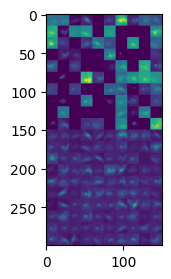

(629538, 15, 15, 1) 131.0 4643.0 455.14035429918926


In [16]:
# data augmentation


from tensorflow.keras import layers, Sequential
from data.visualise import grid_psfs

def aug_dataset(X_train, y_train):
    AUG_RATIO = 5
    MAX_TRANSLATION_PX = 2
    MAX_GAUSS_NOISE = 0.001
    img_size = X_train[0].shape[1]

    aug_pipeline = Sequential([
        layers.GaussianNoise(stddev=MAX_GAUSS_NOISE*X_train[0].max(), seed=SEED),
        layers.RandomTranslation(MAX_TRANSLATION_PX/img_size, MAX_TRANSLATION_PX/img_size, seed=SEED),
        layers.RandomBrightness(0.2, [X_train[0].min(), X_train[0].max()], seed=SEED)
    ])

    idx = np.random.randint(0, X_train[0].shape[0], size=int(AUG_RATIO*X_train[0].shape[0]))

    aug_psfs = aug_pipeline(X_train[0][idx].copy(), training=True).numpy()
    aug_coords = X_train[1][idx]

    aug_z = y_train[idx]

    subset_psfs = np.concatenate((aug_psfs[0:100], X_train[0][idx][0:100]))
    plt.imshow(grid_psfs(subset_psfs.mean(axis=-1)))
    plt.show()

    train_psfs = np.concatenate([aug_psfs, X_train[0]])
    train_coords = np.concatenate([aug_coords, X_train[1]])
    train_zs = np.concatenate([aug_z, y_train])

    X_train = [train_psfs, train_coords]
    y_train = train_zs
    return X_train, y_train

X_train[0] = X_train[0].astype(float)
print(X_train[0].shape, X_train[0].min(), X_train[0].max(), X_train[0].mean())
X_train, y_train = aug_dataset(X_train, y_train)
print(X_train[0].shape, X_train[0].min(), X_train[0].max(), X_train[0].mean())

X_train[0] = X_train[0].astype(np.uint16)

In [17]:
from skimage.transform import resize

def resize_psfs(X):
    print('Resizing...')
    target_size = 32
    imshape = (target_size, target_size, 3)
    X[0] = np.stack([resize(psf, imshape) for psf in X[0]])
    print(X[0].shape)
    print('Finished')

resize_psfs(X_train)
resize_psfs(X_val)

Resizing...
(629538, 32, 32, 3)
Finished
Resizing...
(11711, 32, 32, 3)
Finished


In [18]:
print(X_train[0].shape, X_train[1].shape, y_train.shape)
print(X_val[0].shape, X_val[1].shape, y_val.shape)


(629538, 32, 32, 3) (629538, 2) (629538, 1)
(11711, 32, 32, 3) (11711, 2) (11711, 1)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/65336.0,
    samplewise_center=False,
    samplewise_std_normalization=False,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=False)

print('Fitting datagen...')
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train[0])
print('Fitted')

X_train_preproc = [X_train[0].copy(), X_train[1].copy()]
X_val_preproc = [X_val[0].copy(), X_val[1].copy()]

X_train_preproc[0] = datagen.standardize(X_train_preproc[0].astype(float))
X_val_preproc[0] = datagen.standardize(X_val_preproc[0].astype(float))

# preprocessors = {
#     'psfs': datagen,
#     'coords': coords_scaler
# }

# import pickle
# with open('./scalers.p', 'wb') as f:
#     pickle.dump(preprocessors, f)

Fitting datagen...
Fitted


In [20]:
test_psfs = psfs[test_idx]

test_ys = ys[test_idx]


test_groups = np.repeat(np.arange(len(test_psfs))[:, np.newaxis], test_psfs.shape[1], axis=1)
test_groups = np.concatenate(test_groups)

test_coords = np.repeat(test_coords[:, :, np.newaxis], test_psfs.shape[1], axis=0).squeeze()

test_psfs = np.concatenate(test_psfs)

print(test_psfs.shape, test_coords.shape)

test_ys = np.concatenate(test_ys)[:, np.newaxis]

X_test, y_test = filter_z_range((test_psfs, test_coords), test_ys)

test_groups = X_test[1].copy()


resize_psfs(X_test)
X_test_preproc = [X_test[0].copy(), X_test[1].copy()]
X_test_preproc[0] = datagen.standardize(X_test_preproc[0].astype(float))

print(X_test_preproc[0].shape, X_test_preproc[1].shape, y_test.shape)


(124218, 15, 15, 1) (124218, 2)
Resizing...
(12978, 32, 32, 3)
Finished
(12978, 32, 32, 3) (12978, 2) (12978, 1)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_preproc[1] = scaler.fit_transform(X_train_preproc[1])
X_val_preproc[1] = scaler.transform(X_val_preproc[1])
X_test_preproc[1] = scaler.transform(X_test_preproc[1])

In [22]:
print(X_train_preproc[0].min(), X_train_preproc[0].max())
print(X_val_preproc[0].min(), X_val_preproc[0].max())

print(X_train_preproc[1].min(), X_train_preproc[1].max())
print(X_val_preproc[1].min(), X_val_preproc[1].max())

print(X_train_preproc[0].shape, X_train_preproc[1].shape)
print(X_val_preproc[0].shape, X_val_preproc[1].shape)

0.01711871649169386 1.014634963040543
0.019529986135400235 0.7415483936938334
-1.7568216 1.7619967
-1.7568216 1.7619967
(629538, 32, 32, 3) (629538, 2)
(11711, 32, 32, 3) (11711, 2)


(59797, 32, 32)
Rows 5980 Cols 10 n_spaces 59800 n_psfs 59797
5980


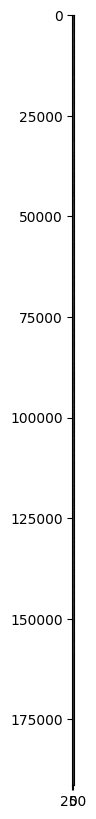

In [23]:
train_idx = np.argwhere(abs(y_train.squeeze()) < 50).squeeze()
tmp_psfs = X_train_preproc[0][train_idx].mean(axis=-1)
print(tmp_psfs.shape)
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(grid_psfs(tmp_psfs))
plt.show()

In [27]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tqdm.keras import TqdmCallback
from tensorflow.keras import regularizers

import tensorflow as tf

def train_model(X_train_preproc, y_train, X_val_preproc, y_val):
    img_input = layers.Input((X_train_preproc[0][0].shape))
    x = img_input
    
    coords_input = layers.Input(X_train_preproc[1][0].shape)
    x_coords = layers.Dense(64)(coords_input)
    
    x_coords = layers.Dense(64)(x_coords)

    x = keras.applications.ResNet101V2(
        input_tensor = img_input,
        include_top=False,
        pooling='max',
#         weights='imagenet',
    )(x)

#     x = keras.applications.MobileNetV3Small(
#         input_tensor=img_input,
#         include_top=False,
#         pooling='avg',
#     )(x)
#     x = keras.applications.MobileNet(
#         input_tensor=img_input,
#         include_top=False,
#         weights='../mobilenet_1_0_128_tf_no_top.h5',
#         pooling='max',
#     )(x)

    x = tf.concat([x, x_coords], axis=-1)
    
#     x = layers.Dense(64, activation='relu')(x)
#     x = layers.Dropout(0.5)(x)
#     x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(1, activation="linear",
                       kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                       bias_regularizer=regularizers.L2(1e-4),
                       activity_regularizer=regularizers.L2(1e-5)
                      )(x)

    model = keras.Model(inputs=(img_input, coords_input), outputs=out)

    model.summary(expand_nested=False)


    batch_size = 256
    epochs = 5000
    lr = 0.0001

    model.compile(loss='mean_squared_error', optimizer=optimizers.AdamW(learning_rate=lr), metrics=['mean_absolute_error'])

    callbacks = [
        ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.1,
                          patience=50, verbose=True, mode='min', min_delta=5, min_lr=1e-6,),
        EarlyStopping(monitor='val_mean_absolute_error', patience=75,
                      verbose=False, min_delta=1, restore_best_weights=True),
        TqdmCallback(verbose=1),
    ]


    history = model.fit(X_train_preproc, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_preproc, y_val), callbacks=callbacks, shuffle=True, verbose=True)

#     model.save('./latest_model')
    return model, history

# X_train_preproc[1][:] = 0
# X_val_preproc[1][:] = 0
model, history = train_model(X_train_preproc, y_train, X_val_preproc, y_val)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           192         ['input_2[0][0]']                
                                                                                                  
 resnet101v2 (Functional)       (None, 2048)         42626560    ['input_1[0][0]']                
                                                                                              

Epoch 1/5000


2023-08-14 08:50:56.719508: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3f09220e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-14 08:50:56.719573: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-08-14 08:50:56.761849: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-14 08:50:57.023580: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2460/2460 [==============================] - 164s 51ms/step - loss: 212651.0000 - mean_absolute_error: 376.5068 - val_loss: 71927.4141 - val_mean_absolute_error: 220.3813 - lr: 1.0000e-04
Epoch 2/5000
2460/2460 [==============================] - 123s 50ms/step - loss: 69242.9297 - mean_absolute_error: 214.5644 - val_loss: 39526.2617 - val_mean_absolute_error: 159.9526 - lr: 1.0000e-04
Epoch 3/5000
2460/2460 [==============================] - 124s 50ms/step - loss: 55613.5820 - mean_absolute_error: 189.9012 - val_loss: 34318.3008 - val_mean_absolute_error: 148.2668 - lr: 1.0000e-04
Epoch 4/5000
2460/2460 [==============================] - 124s 51ms/step - loss: 53101.2266 - mean_absolute_error: 184.4614 - val_loss: 33990.9453 - val_mean_absolute_error: 146.5547 - lr: 1.0000e-04
Epoch 5/5000
2460/2460 [==============================] - 125s 51ms/step - loss: 52367.4766 - mean_absolute_error: 182.8268 - val_loss: 33500.8906 - val_mean_absolute_error: 144.9439 - lr: 1.0000e-04
Epoch 6/5000

Epoch 42/5000
2460/2460 [==============================] - 126s 51ms/step - loss: 32210.8281 - mean_absolute_error: 130.4455 - val_loss: 25277.6660 - val_mean_absolute_error: 118.4426 - lr: 1.0000e-04
Epoch 43/5000
2460/2460 [==============================] - 126s 51ms/step - loss: 32233.0352 - mean_absolute_error: 130.4151 - val_loss: 25572.7402 - val_mean_absolute_error: 119.4780 - lr: 1.0000e-04
Epoch 44/5000
2460/2460 [==============================] - 126s 51ms/step - loss: 31607.7773 - mean_absolute_error: 128.3585 - val_loss: 24703.2148 - val_mean_absolute_error: 117.3463 - lr: 1.0000e-04
Epoch 45/5000
2460/2460 [==============================] - 126s 51ms/step - loss: 30972.9062 - mean_absolute_error: 126.3879 - val_loss: 24962.4180 - val_mean_absolute_error: 118.1976 - lr: 1.0000e-04
Epoch 46/5000
2460/2460 [==============================] - 126s 51ms/step - loss: 31044.3945 - mean_absolute_error: 126.5894 - val_loss: 26135.7324 - val_mean_absolute_error: 121.0738 - lr: 1.0000

KeyboardInterrupt: 

In [ ]:
model.save('./latest_model')

In [ ]:
#     AUG_RATIO = 1
#     MAX_TRANSLATION_PX = 2
#     MAX_GAUSS_NOISE = 0.001
#     img_size = X_train[0].shape[1]

#     aug_pipeline = Sequential([
#         layers.GaussianNoise(stddev=MAX_GAUSS_NOISE*X_train[0].max(), seed=SEED),
#         layers.RandomTranslation(MAX_TRANSLATION_PX/img_size, MAX_TRANSLATION_PX/img_size, seed=SEED),
#         layers.RandomBrightness(0.2, [X_train[0].min(), X_train[0].max()], seed=SEED)
#     ])

# train 41.962
# 16/16 [==============================] - 0s 18ms/step
# val 59.407
# 19/19 [==============================] - 0s 16ms/step
# test 42.7




NameError: name 'history' is not defined

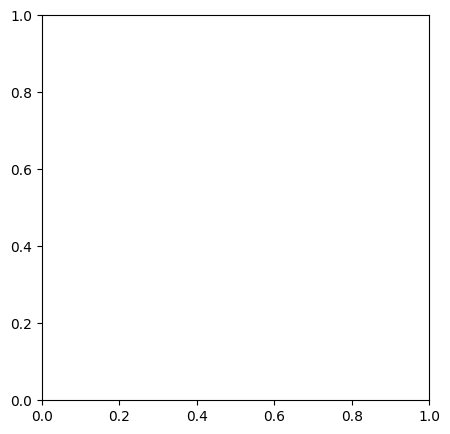

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]
fig, ax1 = plt.subplots()
ax1.plot(history.history['mean_absolute_error'], label='mse')
ax1.plot(history.history['val_mean_absolute_error'], label='val_mse')
ax1.set_ylim([0, 500])
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(history.history['lr'], label='lr', color='red')
ax2.legend(loc=0)


In [26]:
from sklearn.metrics import mean_absolute_error
ds = [
    ('train', (X_train_preproc, y_train)), 
    ('val', (X_val_preproc, y_val)),
    ('test', (X_test_preproc, y_test))
]
for k, (X, y) in ds:
    res = model.predict(X, verbose=True)
    error = mean_absolute_error(res, y)
    print(k, round(error, 3))

2023-08-14 08:47:41.371198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-14 08:47:41.522666: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901


19674/19674 [==============================] - 135s 7ms/step
train 876.444
366/366 [==============================] - 3s 7ms/step
val 857.523
406/406 [==============================] - 3s 7ms/step
test 867.964


In [ ]:
# MAE without located error
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize'] = [3,3]
def bestfit_error(z_true, z_pred):
    def linfit(x, c):
        return x + c

    x = z_true
    y = z_pred
    popt, _ = opt.curve_fit(linfit, x, y, p0=[0])

    x = np.linspace(z_true.min(), z_true.max(), len(y))
    y_fit = linfit(x, popt[0])
    error = mean_absolute_error(y_fit, y)
    plt.plot(x, x, label=f'x=y')
    plt.plot(x, y_fit, label=f'best_fit c={popt[0]}')
    plt.scatter(z_true, z_pred, marker='x', c='orange')
    plt.show()
    return error, popt[0], y_fit-y

ds = [
#     ('train', (X_train_preproc, y_train)),
    ('test', (X_test_preproc, y_test))
]

res = {}
for k, (X, y) in ds:
    pred_z = model.predict(X, verbose=False)
    res[k] = []
    labels = X[1].astype(str)
    labels = [','.join(list(arr)) for arr in labels]
    label_ids = LabelEncoder().fit_transform(labels)
    
    y = y.squeeze()
    for g in set(label_ids):
        idx = np.argwhere(label_ids==g)[:, 0]
        group_psfs = X[0][idx]
        show_psf_axial(group_psfs.mean(axis=-1), '', 2)
        group_true_zs = y[idx]
        group_pred_zs = pred_z[idx][:, 0]
        if len(idx) == 1:
            res[k].append([mean_absolute_error(group_true_zs, group_pred_zs)])
        else:
            error, offset, errors = bestfit_error(group_true_zs, group_pred_zs)
            res[k].extend(errors)

for k, v in res.items():
    print(k, round(np.mean(np.abs(v)), 3))

In [ ]:
for k, v in res.items():
    print(k, round(np.mean(np.abs(v)), 3))

In [ ]:
# Error with xy coords
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder

def bestfit_error(z_true, z_pred):
    def linfit(x, c):
        return x + c

    x = z_true
    y = z_pred
    popt, _ = opt.curve_fit(linfit, x, y, p0=[0])

    x = np.linspace(z_true.min(), z_true.max(), len(y))
    y_fit = linfit(x, popt[0])
    error = mean_absolute_error(y_fit, y)
    plt.plot(x, x, label=f'x=y')
    plt.plot(x, y_fit, label=f'best_fit c={popt[0]}')
    plt.scatter(z_true, z_pred, marker='x', c='orange')
    return error, popt[0], y_fit-y

ds = [
    ('val', (X_val_preproc, y_val)),
    ('test', (X_test_preproc, y_test))
]

res = {}
for k, (X, y) in ds:
    pred_z = model.predict(X, verbose=False)
    res[k] = []
    labels = X[1].astype(str)
    labels = [','.join(list(arr)) for arr in labels]
    label_ids = LabelEncoder().fit_transform(labels)
    
    X2 = X[0].copy(), X[1].copy()
    X2[1][:] = 0
    pred_z_no_coords = model.predict(X2, verbose=False)
    
    y = y.squeeze()
    plt.scatter(y, pred_z, label='w/ coords', marker='.')
    plt.scatter(y, pred_z_no_coords, label='w/o coords', marker='.')
    plt.legend()
    plt.show()
    print(mean_absolute_error(y, pred_z))
    print(mean_absolute_error(y, pred_z_no_coords))

#     for g in set(label_ids):
#         idx = np.argwhere(label_ids==g)[:, 0]
#         group_psfs = X[0][idx]
#         show_psf_axial(group_psfs.mean(axis=-1), '', 2)
#         group_true_zs = y[idx]
#         group_pred_zs = pred_z[idx][:, 0]
#         if len(idx) == 1:
#             res[k].append([mean_absolute_error(group_true_zs, group_pred_zs)])
#         else:
#             error, offset, errors = bestfit_error(group_true_zs, group_pred_zs)
#             error, offset, errors = bestfit_error(group_true_zs, pred_z_no_coords[idx][:, 0])

#         plt.show()


In [ ]:
# Results
# w/               groups    no groups   no groups larger FOV
# train            18.952    11.403      12
# val              55.52     53.929      68
# test             102.356   99.47       74
# test_wo_offsets  48.838    48.318      42

# w/ No reg        groups    no groups   no groups larger FOV
# train            ______    7.9___      ______
# val              ______    54____      ______
# test             ______    126___      ______
# test_wo_offsets  ______    84____      ______


In [ ]:
import pandas as pd
import h5py
import numpy as np

# MQ_DATA
dirname = '/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/'
locs = 'storm_1_MMStack_Default.ome_locs.hdf5'
spots = 'storm_1_MMStack_Default.ome_spots.hdf5'

# FD-DEEPLOC-data

dirname = '/home/miguel/Projects/uni/data/smlm_3d/fd-deeploc-data/demo2_FD_astig_NPC/'
locs = 'roi_startpos_810_790_split.ome_locs.hdf5'
spots = 'roi_startpos_810_790_split.ome_spots.hdf5'


all_locs = pd.read_hdf(dirname+locs, key='locs')
picked_locs = pd.read_hdf(dirname+locs.replace('_locs', '_locs_picked'), key='locs')

with h5py.File(dirname+spots, 'r') as f:
    spots = np.array(f['spots']).astype(np.uint16)

print(all_locs.shape)
print(picked_locs.shape)
print(spots.shape)


In [ ]:
sns.scatterplot(data=all_locs, x='x', y='y', marker='.')
plt.rcParams['figure.figsize'] = [20, 20]

xlim = 150, 170
ylim = 130, 150
plt.xlim(*xlim)
plt.ylim(*ylim)

In [ ]:

# Check values in base image vs spots
# from PIL import Image

# d = Image.open('/home/miguel/Projects/uni/data/smlm_3d/20230601_MQ_celltype/nup/fov2/storm_1/storm_1_MMStack_Default.ome.tif')
# print(d.n_frames)
# d.seek(200)
# np.array(d).max()



In [ ]:
print(all_locs['x'].min(), all_locs['x'].max())
print(picked_locs['x'].min(), picked_locs['x'].max())

In [ ]:
# MQ_data_only
if 'demo2_FD_astig_NPC' in dirname:
    
#     xlim = ((450, 750))
#     ylim = ((450, 750))

    
#     xlim = 105, 110
#     ylim = 60, 65
    l2 = picked_locs[(xlim[0]<picked_locs['x']) & (xlim[1]>picked_locs['x']) & (ylim[0]<picked_locs['y']) & (ylim[1]>picked_locs['y'])]
    all_locs = all_locs.iloc[l2.index]
    picked_locs = all_locs
    spots = spots[l2.index]

all_locs['x'] += 810
all_locs['y'] += 790
print(all_locs.shape)
print(picked_locs.shape)
print(spots.shape)


In [ ]:
if all_locs.shape[0] == picked_locs.shape[0]:
    idx = np.arange(all_locs.shape[0])
else:
    all_keys = list(all_locs[['bg', 'photons']].astype(str).agg('-'.join, axis=1))
    picked_keys = picked_locs[['bg', 'photons']].astype(str).agg('-'.join, axis=1)
    idx = [all_keys.index(k) for k in picked_keys]

exp_psfs = spots[idx]
print(exp_psfs.shape, picked_locs.shape)
print(exp_psfs.min(), exp_psfs.max())
try:
    print(psfs.min(), psfs.max())
    print(psfs.dtype, exp_psfs.dtype)
except NameError:
    pass

In [ ]:
import matplotlib.pyplot as plt
from data.visualise import grid_psfs
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(grid_psfs(exp_psfs[0:100]))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
sns.scatterplot(data=picked_locs, x='x', y='y', alpha=0.01)
# plt.xlim((100, 125))
# plt.ylim((50, 75))
plt.show()


In [24]:
import pickle
import keras

# with open('./scalers.p', 'rb') as f:
#     preprocessors = pickle.load(f)

model = keras.models.load_model('./latest_model/')

# datagen = preprocessors['psfs']
# coords_scaler = preprocessors['coords']

In [ ]:

# print(exp_psfs_preproc.min(), exp_psfs_preproc.max())
# print(X_train_preproc[0].min(), X_train_preproc[0].max())
# print(exp_coords_preproc.min(), exp_coords_preproc.max())
# print(exp_psfs_preproc.shape, exp_coords_preproc.shape)


In [ ]:
print(exp_psfs.dtype, psfs.dtype)

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 3]

exp_coords = picked_locs[['x', 'y']].to_numpy()
exp_coords_preproc = scaler.transform(exp_coords)

In [ ]:
X_exp = [exp_psfs, exp_coords_preproc]
resize_psfs(X_exp)
X_exp[0] = datagen.standardize(X_exp[0].astype(float))

In [ ]:
for X in (X_exp, X_train_preproc):
    print(X[0].min(), X[0].mean(), X[0].max())
    print(X[1].min(), X[1].max())

In [ ]:
pred_z = model.predict(X_exp)
plt.rcParams['figure.figsize'] = [3,3]
sns.histplot(pred_z)
plt.show()




In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import ParameterGrid
from scipy.stats import norm


def gmm_bic_score(estimator, X):
    return estimator.bic(X)

param_grid = {
    "n_components": range(1, 3),
    "covariance_type": ["full"],
}


def get_n_components(data):
    
    res = []
    estimators = []
    for param in ParameterGrid(param_grid):
        gm = GaussianMixture(**param).fit(data)
        param['score'] = gm.bic(data)
        res.append(param)
        estimators.append(gm)
    
    df = pd.DataFrame.from_records(res)
    best_params = np.argmin(df['score'].to_numpy())
    return estimators[best_params]



def get_cov(gm, i):
    cov_type = gm.covariance_type
    if cov_type == 'tied':
        cov = gm.covariances_.squeeze()
    elif cov_type == 'full' or cov_type == None:
        cov = gm.covariances_[i][0][0]
    elif cov_type == 'spherical':
        cov = gm.covariances_[i]
    elif cov_type == 'diag':
        cov = gm.covariances_[i]
    
    return cov

def fit_gmm(ax, data):

    if len(data) < 5:
        sns.histplot(data, stat='density', ax=ax)
        return


    gm = get_n_components(data)
    df = pd.DataFrame.from_dict({
        'z': data.squeeze(),
        'labels': gm.predict(data).squeeze().astype(str)
    })
    
    sns.histplot(data=df, x='z', hue='labels', stat='density', bins=20, ax=ax)
    
    x = np.linspace(data.min(), data.max(), 100)

    print(gm.means_)
    for i in range(gm.n_components):
        cov = get_cov(gm, i)
        mean = float(gm.means_[i][0])
        weight = gm.weights_[i]
        ax.set_title(f'{gm.n_components}')
        ax.plot(x, norm.pdf(x, m, np.sqrt(cov))*weight, label=str(i))

    
picked_locs['z'] = pred_z
xyz = picked_locs[['x', 'y', 'z']].to_numpy()
xy = xyz[:, [0, 1]]

cls = DBSCAN(eps=0.3, min_samples=15).fit_predict(xy).astype(str)

picked_locs['clusterID'] = cls

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=picked_locs, x='x', y='y', hue='clusterID', legend=False)
plt.show()


plt.rcParams['figure.figsize'] = [10, 3]
for cluster_id in set(cls):
    cluster_locs = picked_locs[picked_locs['clusterID'] == cluster_id]
    cluster_coords = cluster_locs[['x', 'y']].to_numpy()
    
    cluster_locs['sub_clusterID'] = KMeans(n_init=8, n_clusters=8).fit_predict(cluster_coords).astype(str)
    
    if cluster_locs.shape[0] < 50:
        continue
    
    fig = plt.figure()
    gs = fig.add_gridspec(1, 4)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2:4])

    sns.scatterplot(data=cluster_locs, x='x', y='y', marker='.', hue='sub_clusterID', ax=ax1, legend=False)
    sns.violinplot(data=cluster_locs, y='z', marker='.', ax=ax2)
    sns.kdeplot(data=cluster_locs, x='z', ax=ax3)
    plt.show()

    fig2 = plt.figure()
    gs2 = fig2.add_gridspec(1, 8)
    axes = []
    for i in sorted(set(cluster_locs['sub_clusterID'])):
        if int(i) > 0:
            ax = fig2.add_subplot(gs2[0, int(i)], sharey=axes[0])
            plt.setp(ax.get_yticklabels(), visible=False)
        else:
            ax = fig2.add_subplot(gs2[0, int(i)])
        axes.append(ax)
        
        z_data = cluster_locs[cluster_locs['sub_clusterID']==i]['z'].to_numpy()[:, np.newaxis]
        fit_gmm(ax, z_data)
        
        
    plt.show()
    



In [ ]:
data = picked_locs['z'].to_numpy()[:, np.newaxis]
sns.histplot(data, stat='density', bins=100)


fit = get_n_components(data)
means = fit.means_
print(means)
print(fit.__dict__)
x = np.linspace(data.min(), data.max(), 100)

cov = fit.covariances_.squeeze()
for i in range(fit.n_components):
    mean = float(fit.means_[i][0])
    weight = fit.weights_[i]
    plt.plot(x, norm.pdf(x, m, np.sqrt(cov))*weight)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]

idx = np.argsort(pred_z.squeeze())
sorted_psfs = exp_psfs[idx]
plt.imshow(grid_psfs(sorted_psfs[::10]))


In [ ]:
plt.rcParams['figure.figsize'] = [5, 3]
for sd in [40]:
    p1 = np.random.normal(0, sd, size=10000)
    p2 = np.random.normal(50, sd, size=10000)
    data = np.concatenate((p1, p2))
    plt.title(f'Stdev: {sd}')
    sns.histplot(data)
    plt.xlabel('Z (nm)')
    plt.show()